# Energy A.I. Hackathon 2023 - Project Template 

## General Guidance

We're expecting a workflow that could be deployed to any competent engineer or scientist with basic subsurface resource, data analytics and machine learning knowledge and they could understand and apply your workflow. 

### Expectations on the Workflow

* include short descriptions, no 2 code blocks should be adjacent, always have a short statement to explain the next code block

* be as concise as possible:

    * use point form (except for the executive summary) 
    * use effective, creative figures that compine what could have been in multiple plots
    * every line of code, statment or figure must have purpose
    * conciseness is part of the grading, don't add content that isn't needed
    
* be very clear with readable code

    * label every axis for every plot
    * use readable code, logical variable names, use available functionality and define functions and classes for compactness and concise comments in the code
    * proceed step by step, explain each important step concisely for a easy to follow narrative 
    

## The Workflow Template

Here's the template for your workflow.

___

# Energy A.I. Hackathon 2023 Workflow - LongHorns of McCombs

### Team Members:
#### Disha Gandhi ,Masters in Business Analytics candidate, McCombs School of Business
#### Naoufal Ennadi, Undergrad , Hildebrand Department of Petroleum and Geosystems Engineering 
#### Muskaan Singhania, Masters in Business Analytics candidate, McCombs School of Business
#### Anudeep Kumar Akkana, Masters in Business Analytics candidate, McCombs School of Business

#### The University of Texas at Austin, Austin, Texas USA 
___

### Executive Summary 

The Problem is to find out which combination of Well and ESP will fail in the next 30 days out of the 40 ones which have not failed yet. Our team has trained a classification problem using the daily data for pumps running in which last 30 days of data is excluded and cummulative running features are considered to finally test on the last day of Non-Failed pumps to find out if they will fail in the next 30 days. Our team learnt the functioning of ESP's, what factors are crutial in it's failure and how to interpret and deal with a time series data.


___

### Workflow Goal

The Goal of our workflow is to generate target variable for the training set and use a model with a good accuracy to classify the test data well. The Goal of the workflow is also to find out the best kind of sequence that we can use in our model to gauge the maximum information
___

### Workflow Steps 

Enumerated steps, very short and concise overview of your methods and workflow

1. **Data Analysis** - basic data checking and visualization
We plotted different visualizations, summary statistics for both data sources and for both kinds of pumps, ones which have failed and ones which have not to find out, if any difference exists in the statistics of both. We have used descriptive statistics in it because we felt for machine learning purpose that will be fit for the use.
2. **Feature Selection** - mutual information-based approach with minimum redundancy, maximum relevance score
Over here, we implemented feature imputation with two methods KNN and MICE for both data sources. We compared the results with basic summary statistics to make sure there is not a huge deviation.
We then moved on to constructing our target variable via an algorithm and then merged this with static well data
3. **Machine Learning Model \#1** - Predict feature $X$ from $Y,Z$
We here aimed for utilizing our time series data in order to form running cummulative figures for all features and hence we settled on using LSTM which specializes in sequential data and is also fit for classification purpose

$\ldots$


### Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re
import os
import os.path
from pathlib import Path
import glob
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy.signal import spectrogram
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D, MaxPool1D, GlobalAvgPool1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from tensorflow.keras import regularizers
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

2023-01-22 11:12:28.025635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/dishagandhi/opt/anaconda3/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Load Data

The following workflow applies the .csv file '300well_MV.csv', a synthetic dataset calculated with geostatistical cosimulation by Wayne Gretzky, The Edmonton Oilers Hockey Team. The dataset is publically available [here](http://www.hasthelargehadroncolliderdestroyedtheworldyet.com/)  

We will work with the following features:

* **porosity** - fraction of rock void in units of percentage
* **permeability** - ability of a fluid to flow through the rock in mil;iDarcy
* **acoustic impedence** - product of sonic velocity and rock density in unitsof $kg/m^2s*10^3$

In [3]:
#reading in all data sources
well_data = pd.read_csv('wellData.csv')     # static well data
daily_data = pd.read_csv('dailyData.csv')   # dynamic daily pump data
solutions_data = pd.read_csv('solution.csv')   # predictions to make

### Functions

The following functions will be used in the workflow.

In [26]:
def plot_corr(dataframe,size=10):                       # plots a correlation matrix as a heat map 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

### Basic Data Checking and Visualization for Static Well Data


In [4]:
# interpreting and looking at the data to get a hint of whole dataframe

well_data.head(5)

Unnamed: 0  Well_ID AL_Key Artificial_Lift_Type  AL_Bottom_Depth  \
0           0      345  ESP_2                  ESP          9056.67   
1           1       29  ESP_3                  ESP          8982.09   
2           2      327  ESP_1                  ESP          8876.37   
3           3       71  ESP_1                  ESP          8930.11   
4           4      125  ESP_2                  ESP          8616.41   

   ESP_Pump_Stages  DLS_Critical  ESP_Motor_Frequency_Rating  \
0                0      5.323174                         NaN   
1                0      6.440650                         NaN   
2                0      5.669751                         NaN   
3                0      5.614798                         NaN   
4              348     26.061750                         NaN   

   ESP_Motor_Current_Rating  ESP_Motor_Voltage_Rating  ESP_Motor_Power_Rating  \
0                       NaN                       NaN                     NaN   
1                       NaN                       NaN                     NaN   
2                       NaN                       NaN                     NaN   
3                       NaN                       NaN                     NaN   
4                       NaN                       NaN                     NaN   

   DLS_at_Set_Depth  
0          1.713554  
1          2.789395  
2          0.481680  
3          0.842038  
4               NaN

In [21]:
# interpreting and looking at the data to get a hint of whole dataframe

solutions_data.head(5)

Well_ID AL_Key  Fail in 30 days
0      327  ESP_1                0
1      125  ESP_2                1
2      260  ESP_3                0
3       21  ESP_1                1
4       16  ESP_1                0

In [7]:
well_data.shape

(166, 12)

In [5]:
# getting the null count across all columns along with their datatypes

well_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  166 non-null    int64  
 1   Well_ID                     166 non-null    int64  
 2   AL_Key                      166 non-null    object 
 3   Artificial_Lift_Type        166 non-null    object 
 4   AL_Bottom_Depth             166 non-null    float64
 5   ESP_Pump_Stages             166 non-null    int64  
 6   DLS_Critical                163 non-null    float64
 7   ESP_Motor_Frequency_Rating  10 non-null     float64
 8   ESP_Motor_Current_Rating    85 non-null     float64
 9   ESP_Motor_Voltage_Rating    85 non-null     float64
 10  ESP_Motor_Power_Rating      85 non-null     float64
 11  DLS_at_Set_Depth            67 non-null     float64
dtypes: float64(7), int64(3), object(2)
memory usage: 15.7+ KB


We have here constructed two dataframes that will represent the failed and successful pumps as of today's day

In [5]:
well_data_failed = pd.merge(well_data, solutions_data, on=["Well_ID", "AL_Key"], how="outer", indicator=True)
well_data_failed = well_data_failed.loc[well_data_failed["_merge"] == "left_only"].drop("_merge", axis=1)

In [6]:
well_data_success = pd.merge(well_data, solutions_data, on=["Well_ID", "AL_Key"], how="outer", indicator=True)
well_data_success = well_data_success.loc[well_data_success["_merge"] == "both"].drop("_merge", axis=1)

These steps here explain the missing values in columns in both successful and failed pumps in order to get the ratio of missing values and if it shows any pattern


In [26]:
well_data_failed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 165
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  126 non-null    int64  
 1   Well_ID                     126 non-null    int64  
 2   AL_Key                      126 non-null    object 
 3   Artificial_Lift_Type        126 non-null    object 
 4   AL_Bottom_Depth             126 non-null    float64
 5   ESP_Pump_Stages             126 non-null    int64  
 6   DLS_Critical                123 non-null    float64
 7   ESP_Motor_Frequency_Rating  10 non-null     float64
 8   ESP_Motor_Current_Rating    67 non-null     float64
 9   ESP_Motor_Voltage_Rating    67 non-null     float64
 10  ESP_Motor_Power_Rating      67 non-null     float64
 11  DLS_at_Set_Depth            43 non-null     float64
 12  Fail in 30 days             0 non-null      float64
dtypes: float64(8), int64(3), object(2)


In [38]:
well_data_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2 to 163
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  40 non-null     int64  
 1   Well_ID                     40 non-null     int64  
 2   AL_Key                      40 non-null     object 
 3   Artificial_Lift_Type        40 non-null     object 
 4   AL_Bottom_Depth             40 non-null     float64
 5   ESP_Pump_Stages             40 non-null     int64  
 6   DLS_Critical                40 non-null     float64
 7   ESP_Motor_Frequency_Rating  0 non-null      float64
 8   ESP_Motor_Current_Rating    18 non-null     float64
 9   ESP_Motor_Voltage_Rating    18 non-null     float64
 10  ESP_Motor_Power_Rating      18 non-null     float64
 11  DLS_at_Set_Depth            24 non-null     float64
 12  Fail in 30 days             40 non-null     float64
dtypes: float64(8), int64(3), object(2)
m

In [9]:
# looking at the statistics for each column to identify numerical and categorical data on the whole well data
well_data.describe(include='all')

Unnamed: 0     Well_ID AL_Key Artificial_Lift_Type  AL_Bottom_Depth  \
count   166.000000  166.000000    166                  166       166.000000   
unique         NaN         NaN      5                    1              NaN   
top            NaN         NaN  ESP_1                  ESP              NaN   
freq           NaN         NaN    125                  166              NaN   
mean     82.500000  130.584337    NaN                  NaN      8077.384518   
std      48.064193  107.306085    NaN                  NaN       785.601429   
min       0.000000    0.000000    NaN                  NaN         0.000000   
25%      41.250000   50.250000    NaN                  NaN      7784.477500   
50%      82.500000   99.500000    NaN                  NaN      8131.600000   
75%     123.750000  165.000000    NaN                  NaN      8544.970000   
max     165.000000  362.000000    NaN                  NaN      9056.670000   

        ESP_Pump_Stages  DLS_Critical  ESP_Motor_Frequency_Rating  \
count        166.000000    163.000000                        10.0   
unique              NaN           NaN                         NaN   
top                 NaN           NaN                         NaN   
freq                NaN           NaN                         NaN   
mean         234.885542     17.250072                        60.0   
std          175.935264      6.332956                         0.0   
min            0.000000      4.879671                        60.0   
25%            0.000000     13.133512                        60.0   
50%          267.000000     17.561921                        60.0   
75%          415.000000     20.490922                        60.0   
max          504.000000     36.113674                        60.0   

        ESP_Motor_Current_Rating  ESP_Motor_Voltage_Rating  \
count                  85.000000                 85.000000   
unique                       NaN                       NaN   
top                          NaN                       NaN   
freq                         NaN                       NaN   
mean                   70.781176               2230.929412   
std                    45.378206                838.594669   
min                    18.000000               1055.000000   
25%                    67.100000               1393.000000   
50%                    67.100000               2626.000000   
75%                    75.000000               2626.000000   
max                   456.000000               4181.000000   

        ESP_Motor_Power_Rating  DLS_at_Set_Depth  
count                85.000000         67.000000  
unique                     NaN               NaN  
top                        NaN               NaN  
freq                       NaN               NaN  
mean                227.922353          4.844286  
std                  86.662526         17.647618  
min                  18.000000          0.092562  
25%                 161.000000          0.321964  
50%                 216.000000          0.682052  
75%                 270.000000          2.266419  
max                 456.000000        143.251918

In [28]:
# looking at the statistics for each column to identify numerical and categorical data on just the failed pumps
well_data_failed.describe(include='all')

Unnamed: 0     Well_ID AL_Key Artificial_Lift_Type  AL_Bottom_Depth  \
count   126.000000  126.000000    126                  126       126.000000   
unique         NaN         NaN      4                    1              NaN   
top            NaN         NaN  ESP_1                  ESP              NaN   
freq           NaN         NaN     96                  126              NaN   
mean     83.825397  139.968254    NaN                  NaN      8064.692302   
std      48.093921  111.516667    NaN                  NaN       858.554959   
min       0.000000    0.000000    NaN                  NaN         0.000000   
25%      43.500000   54.250000    NaN                  NaN      7798.810000   
50%      84.500000  106.500000    NaN                  NaN      8154.020000   
75%     125.500000  244.500000    NaN                  NaN      8525.260000   
max     165.000000  362.000000    NaN                  NaN      9056.670000   

        ESP_Pump_Stages  DLS_Critical  ESP_Motor_Frequency_Rating  \
count        126.000000    123.000000                        10.0   
unique              NaN           NaN                         NaN   
top                 NaN           NaN                         NaN   
freq                NaN           NaN                         NaN   
mean         234.373016     16.992447                        60.0   
std          174.041868      6.212958                         0.0   
min            0.000000      5.145557                        60.0   
25%            0.000000     12.998440                        60.0   
50%          267.000000     17.500029                        60.0   
75%          413.750000     19.588966                        60.0   
max          504.000000     36.113674                        60.0   

        ESP_Motor_Current_Rating  ESP_Motor_Voltage_Rating  \
count                  67.000000                 67.000000   
unique                       NaN                       NaN   
top                          NaN                       NaN   
freq                         NaN                       NaN   
mean                   72.116418               2260.164179   
std                    50.487576                857.500483   
min                    18.000000               1156.000000   
25%                    67.100000               1393.000000   
50%                    67.100000               2626.000000   
75%                    75.000000               2626.000000   
max                   456.000000               4181.000000   

        ESP_Motor_Power_Rating  DLS_at_Set_Depth  Fail in 30 days  
count                67.000000         43.000000              0.0  
unique                     NaN               NaN              NaN  
top                        NaN               NaN              NaN  
freq                       NaN               NaN              NaN  
mean                229.477612          5.881610              NaN  
std                  88.256918         21.849831              NaN  
min                  18.000000          0.092562              NaN  
25%                 161.000000          0.331769              NaN  
50%                 270.000000          0.515732              NaN  
75%                 270.000000          1.971662              NaN  
max                 456.000000        143.251918              NaN

In [37]:
# looking at the statistics for each column to identify numerical and categorical data on just the successful pumps
well_data_success.describe(include='all')

Unnamed: 0    Well_ID AL_Key Artificial_Lift_Type  AL_Bottom_Depth  \
count    40.000000   40.00000     40                   40        40.000000   
unique         NaN        NaN      4                    1              NaN   
top            NaN        NaN  ESP_1                  ESP              NaN   
freq           NaN        NaN     29                   40              NaN   
mean     78.325000  101.02500    NaN                  NaN      8117.365000   
std      48.339286   87.61322    NaN                  NaN       496.375903   
min       2.000000    6.00000    NaN                  NaN      7205.700000   
25%      33.500000   26.50000    NaN                  NaN      7673.472500   
50%      77.500000   87.00000    NaN                  NaN      8105.425000   
75%     118.500000  126.00000    NaN                  NaN      8582.667500   
max     163.000000  327.00000    NaN                  NaN      8876.370000   

        ESP_Pump_Stages  DLS_Critical  ESP_Motor_Frequency_Rating  \
count         40.000000     40.000000                         0.0   
unique              NaN           NaN                         NaN   
top                 NaN           NaN                         NaN   
freq                NaN           NaN                         NaN   
mean         236.500000     18.042269                         NaN   
std          184.030516      6.707545                         NaN   
min            0.000000      4.879671                         NaN   
25%            0.000000     14.997031                         NaN   
50%          300.000000     19.393632                         NaN   
75%          415.000000     23.011621                         NaN   
max          488.000000     33.171409                         NaN   

        ESP_Motor_Current_Rating  ESP_Motor_Voltage_Rating  \
count                  18.000000                 18.000000   
unique                       NaN                       NaN   
top                          NaN                       NaN   
freq                         NaN                       NaN   
mean                   65.811111               2122.111111   
std                    15.668398                777.309454   
min                    18.000000               1055.000000   
25%                    67.100000               1464.750000   
50%                    67.100000               2069.500000   
75%                    73.000000               2626.000000   
max                    91.000000               4181.000000   

        ESP_Motor_Power_Rating  DLS_at_Set_Depth  Fail in 30 days  
count                18.000000         24.000000         40.00000  
unique                     NaN               NaN              NaN  
top                        NaN               NaN              NaN  
freq                       NaN               NaN              NaN  
mean                222.133333          2.985748          0.50000  
std                  82.610012          4.034255          0.50637  
min                  71.400000          0.179874          0.00000  
25%                 162.500000          0.313094          0.00000  
50%                 199.500000          0.899175          0.50000  
75%                 270.000000          3.899225          1.00000  
max                 456.000000         11.671727          1.00000

This here tells us that **Artificial_Lift_Type** feature has only one value throughout and hence is not very useful



In [11]:
well_data.Artificial_Lift_Type.value_counts()

ESP    166
Name: Artificial_Lift_Type, dtype: int64

We then thought of checking if the ratio of each ESP pump is different in successful and failed pump combinations.

In [12]:
well_data.AL_Key.value_counts()

ESP_1    125
ESP_2     33
ESP_3      5
ESP_4      2
ESP_5      1
Name: AL_Key, dtype: int64

In [30]:
well_data_failed.AL_Key.value_counts()

ESP_1    96
ESP_2    25
ESP_3     3
ESP_4     2
Name: AL_Key, dtype: int64

In [39]:
well_data_success.AL_Key.value_counts()

ESP_1    29
ESP_2     8
ESP_3     2
ESP_5     1
Name: AL_Key, dtype: int64

Here, we can clearly see that **ESP_Motor_Frequency_Rating** feature is having similar missing values across whole data and successful combinations do not have this feature populated

In [15]:
well_data.ESP_Motor_Frequency_Rating.value_counts()

60.0    10
Name: ESP_Motor_Frequency_Rating, dtype: int64

In [31]:
well_data_failed.ESP_Motor_Frequency_Rating.value_counts()

60.0    10
Name: ESP_Motor_Frequency_Rating, dtype: int64

**ESP_Motor_Current_Rating** feature has similar ratios across both successful and failed pumps and the boxplot shows how the outliers are heavily influencing the statistics

In [16]:
well_data.ESP_Motor_Current_Rating.value_counts()

67.1     36
75.0     15
73.0      7
18.0      6
91.0      6
46.6      2
76.0      2
52.0      2
49.6      1
70.0      1
78.5      1
44.0      1
456.0     1
42.3      1
90.5      1
75.5      1
55.2      1
Name: ESP_Motor_Current_Rating, dtype: int64

In [32]:
well_data_failed.ESP_Motor_Current_Rating.value_counts()

67.1     29
75.0     12
91.0      5
18.0      5
73.0      4
52.0      2
76.0      2
46.6      2
75.5      1
90.5      1
44.0      1
456.0     1
78.5      1
55.2      1
Name: ESP_Motor_Current_Rating, dtype: int64

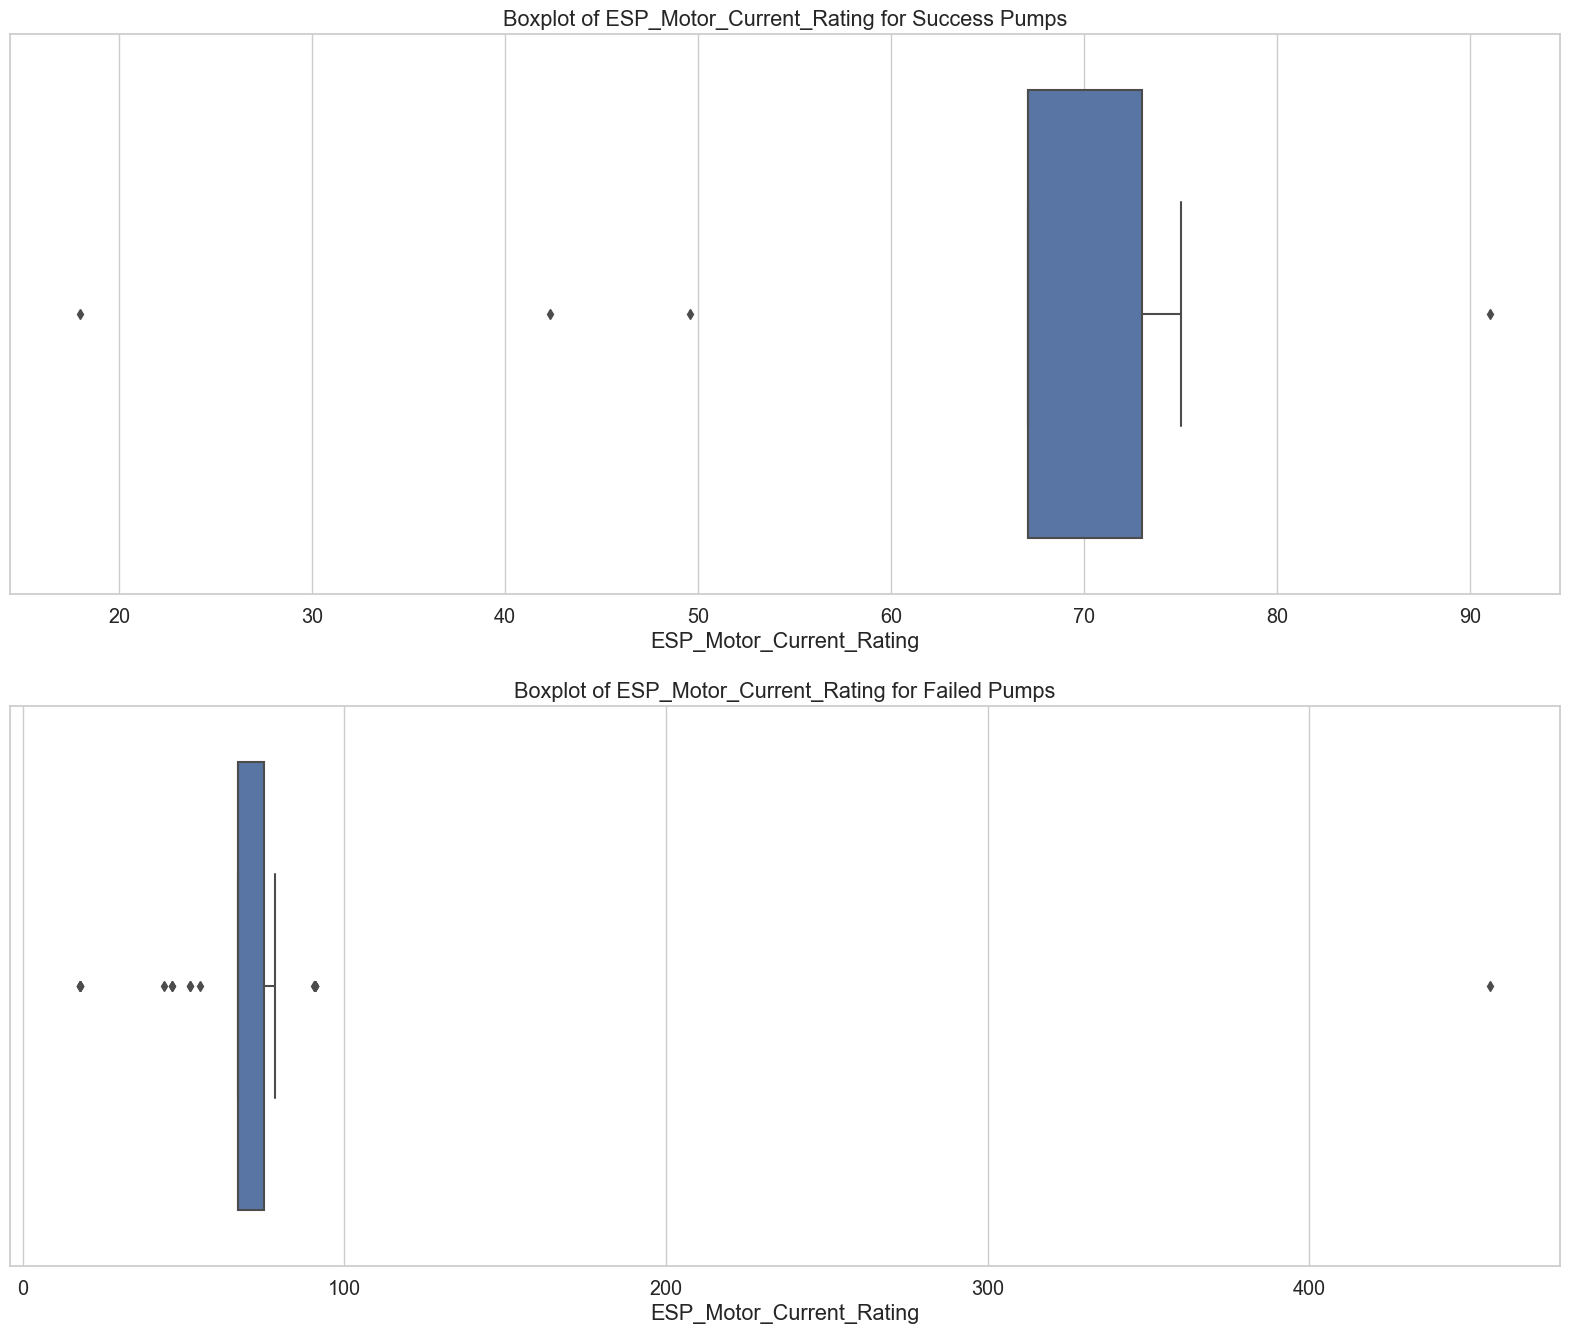

In [7]:
fig, ax = plt.subplots(figsize=(20,16), nrows=2, ncols=1);

plt.subplot(2,1,1)
sns.set(font_scale=1.3, style="whitegrid")
sns.boxplot(x =well_data_success['ESP_Motor_Current_Rating'])
plt.title('Boxplot of ESP_Motor_Current_Rating for Success Pumps')

plt.subplot(2,1,2)
sns.set(font_scale=1.3, style="whitegrid")
sns.boxplot(x =well_data_failed['ESP_Motor_Current_Rating'])
plt.title('Boxplot of ESP_Motor_Current_Rating for Failed Pumps')

plt.show()

**ESP_Motor_Voltage_Rating and ESP_Motor_Power_Rating** feature also has similar ratios across both successful and failed pumps

In [17]:
well_data.ESP_Motor_Voltage_Rating.value_counts()

2626.0    36
1393.0    15
1222.0     7
4181.0     7
1680.0     5
1508.0     2
1835.0     2
1186.0     2
2730.0     2
1156.0     1
2950.0     1
2314.0     1
1664.0     1
1825.0     1
1055.0     1
2495.0     1
Name: ESP_Motor_Voltage_Rating, dtype: int64

In [33]:
well_data_failed.ESP_Motor_Voltage_Rating.value_counts()

2626.0    29
1393.0    12
1222.0     6
4181.0     6
1508.0     2
1680.0     2
1835.0     2
1186.0     2
2730.0     2
1156.0     1
2950.0     1
1664.0     1
2495.0     1
Name: ESP_Motor_Voltage_Rating, dtype: int64

In [18]:
well_data.ESP_Motor_Power_Rating.value_counts()

270.0    36
161.0    15
167.0     7
456.0     5
191.0     5
208.0     3
195.0     2
110.0     2
45.0      1
71.4      1
204.0     1
120.0     1
18.0      1
150.0     1
442.0     1
200.0     1
134.0     1
216.0     1
Name: ESP_Motor_Power_Rating, dtype: int64

In [34]:
well_data_failed.ESP_Motor_Power_Rating.value_counts()

270.0    29
161.0    12
167.0     6
456.0     4
191.0     2
208.0     2
110.0     2
195.0     2
442.0     1
134.0     1
200.0     1
120.0     1
18.0      1
204.0     1
45.0      1
216.0     1
Name: ESP_Motor_Power_Rating, dtype: int64

We can also see unique combinations across wells and pumps

In [14]:
well_data.groupby(['Well_ID','AL_Key']).size()

Well_ID  AL_Key
0        ESP_1     1
1        ESP_2     1
4        ESP_2     1
5        ESP_1     1
6        ESP_1     1
                  ..
353      ESP_2     1
354      ESP_1     1
361      ESP_1     1
362      ESP_1     1
         ESP_2     1
Length: 166, dtype: int64

We then wanted to see if **DLS_at_Set_Depth** feature is having any different ratios for successful pumps because the summary stats were different but turns out it is not, it was just the outliers behaving badly!!

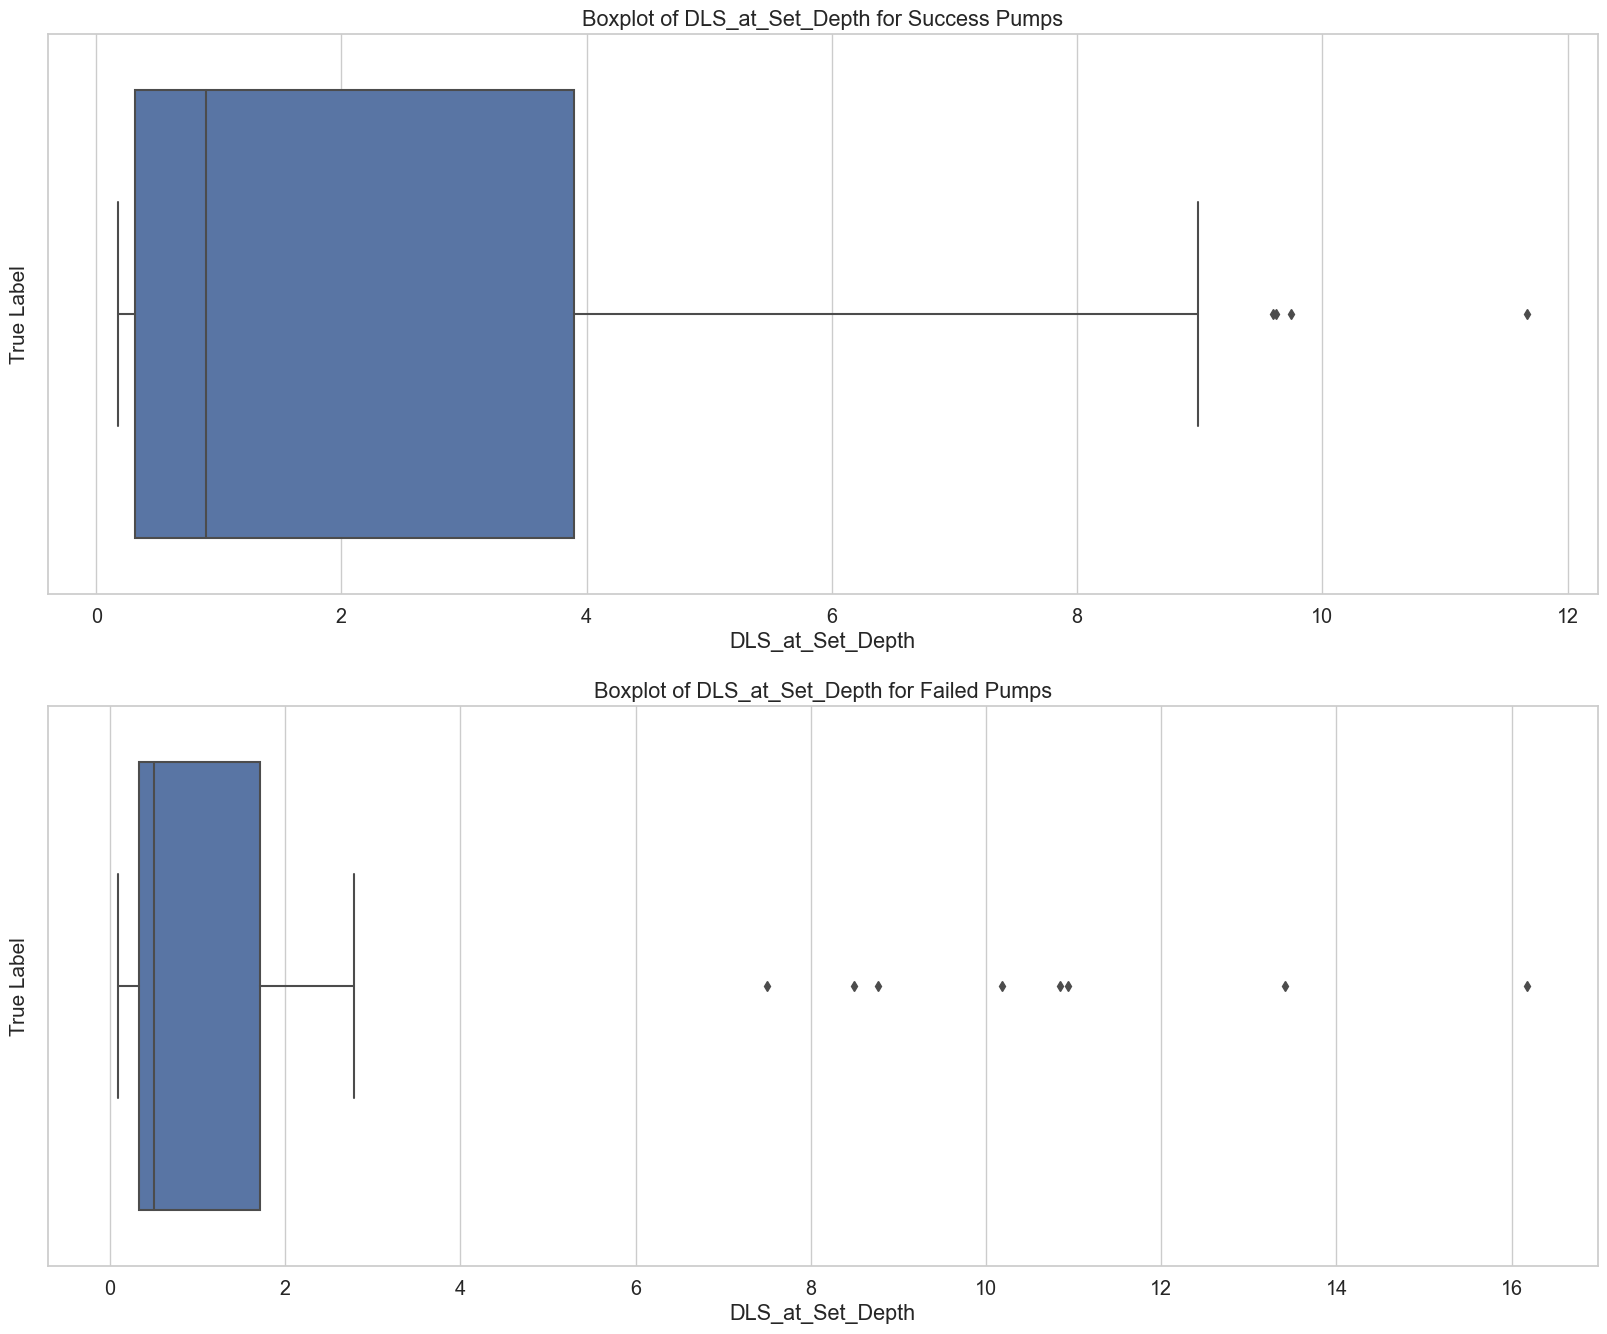

In [59]:
#plot the result
fig, ax = plt.subplots(figsize=(20,16), nrows=2, ncols=1);

plt.subplot(2,1,1)
sns.set(font_scale=1.3, style="whitegrid")
sns.boxplot(x =well_data_success['DLS_at_Set_Depth'])
plt.title('Boxplot of DLS_at_Set_Depth for Success Pumps')
plt.ylabel("True Label", fontsize=15)

plt.subplot(2,1,2)
sns.set(font_scale=1.3, style="whitegrid")
sns.boxplot(x =well_data_failed['DLS_at_Set_Depth'])
plt.title('Boxplot of DLS_at_Set_Depth for Failed Pumps')
plt.ylabel("True Label", fontsize=15)

plt.show()

### Feature Imputation for Static Well Data

We can see here that we implemented both KNN and MICE imputer but the results for missing data were best with MICE for static data. What we mean by this is that after filling missing values our statistics did not change by any huge amount. We used this to check which method works best

In [9]:
from sklearn.impute import KNNImputer

knn_imputed_data=well_data.copy()
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
knn_imputed_data.iloc[:,6:] = knn_imputer.fit_transform(knn_imputed_data.iloc[:,6:])

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputed_data=well_data.copy()
lr = LinearRegression()
mice_imputer = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
imputed_data.iloc[:,6:] = mice_imputer.fit_transform(imputed_data.iloc[:,6:])

[IterativeImputer] Completing matrix with shape (166, 6)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Change: 7364.135056303914, scaled tolerance: 4.181 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.04
[IterativeImputer] Change: 2364.422471251566, scaled tolerance: 4.181 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.05
[IterativeImputer] Change: 789.3845472612792, scaled tolerance: 4.181 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.05
[IterativeImputer] Change: 184.88056709010243, scaled tolerance: 4.181 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.06
[IterativeImputer] Change: 207.9316540794116, scaled tolerance: 4.181 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.07
[IterativeImputer] Change: 278.8228718638592, scaled tolerance: 4.181 
[IterativeImputer] Ending imputation round 7/10, elapsed time 0.07
[IterativeImputer] Change: 249.73990933109073, 

In [7]:
well_data.describe(include='all')

Unnamed: 0     Well_ID AL_Key Artificial_Lift_Type  AL_Bottom_Depth  \
count   166.000000  166.000000    166                  166       166.000000   
unique         NaN         NaN      5                    1              NaN   
top            NaN         NaN  ESP_1                  ESP              NaN   
freq           NaN         NaN    125                  166              NaN   
mean     82.500000  130.584337    NaN                  NaN      8077.384518   
std      48.064193  107.306085    NaN                  NaN       785.601429   
min       0.000000    0.000000    NaN                  NaN         0.000000   
25%      41.250000   50.250000    NaN                  NaN      7784.477500   
50%      82.500000   99.500000    NaN                  NaN      8131.600000   
75%     123.750000  165.000000    NaN                  NaN      8544.970000   
max     165.000000  362.000000    NaN                  NaN      9056.670000   

        ESP_Pump_Stages  DLS_Critical  ESP_Motor_Frequency_Rating  \
count        166.000000    163.000000                        10.0   
unique              NaN           NaN                         NaN   
top                 NaN           NaN                         NaN   
freq                NaN           NaN                         NaN   
mean         234.885542     17.250072                        60.0   
std          175.935264      6.332956                         0.0   
min            0.000000      4.879671                        60.0   
25%            0.000000     13.133512                        60.0   
50%          267.000000     17.561921                        60.0   
75%          415.000000     20.490922                        60.0   
max          504.000000     36.113674                        60.0   

        ESP_Motor_Current_Rating  ESP_Motor_Voltage_Rating  \
count                  85.000000                 85.000000   
unique                       NaN                       NaN   
top                          NaN                       NaN   
freq                         NaN                       NaN   
mean                   70.781176               2230.929412   
std                    45.378206                838.594669   
min                    18.000000               1055.000000   
25%                    67.100000               1393.000000   
50%                    67.100000               2626.000000   
75%                    75.000000               2626.000000   
max                   456.000000               4181.000000   

        ESP_Motor_Power_Rating  DLS_at_Set_Depth  
count                85.000000         67.000000  
unique                     NaN               NaN  
top                        NaN               NaN  
freq                       NaN               NaN  
mean                227.922353          4.844286  
std                  86.662526         17.647618  
min                  18.000000          0.092562  
25%                 161.000000          0.321964  
50%                 216.000000          0.682052  
75%                 270.000000          2.266419  
max                 456.000000        143.251918

In [14]:
imputed_data.describe()

Unnamed: 0     Well_ID  AL_Bottom_Depth  ESP_Pump_Stages  DLS_Critical  \
count  166.000000  166.000000       166.000000       166.000000    166.000000   
mean    82.500000  130.584337      8077.384518       234.885542     17.236230   
std     48.064193  107.306085       785.601429       175.935264      6.283292   
min      0.000000    0.000000         0.000000         0.000000      4.879671   
25%     41.250000   50.250000      7784.477500         0.000000     13.221325   
50%     82.500000   99.500000      8131.600000       267.000000     17.711956   
75%    123.750000  165.000000      8544.970000       415.000000     20.370862   
max    165.000000  362.000000      9056.670000       504.000000     36.113674   

       ESP_Motor_Frequency_Rating  ESP_Motor_Current_Rating  \
count                       166.0                166.000000   
mean                         60.0                 70.185518   
std                           0.0                 34.697908   
min                          60.0                 18.000000   
25%                          60.0                 67.100000   
50%                          60.0                 69.321272   
75%                          60.0                 73.000000   
max                          60.0                456.000000   

       ESP_Motor_Voltage_Rating  ESP_Motor_Power_Rating  DLS_at_Set_Depth  
count                166.000000              166.000000        166.000000  
mean                2184.466467              219.100019          5.234979  
std                  721.493692               67.317060         21.217641  
min                 1055.000000               18.000000        -34.777380  
25%                 1680.000000              169.690014          0.402872  
50%                 2162.602958              212.426525          2.809859  
75%                 2626.000000              270.000000          7.312753  
max                 6545.440022              456.000000        226.182130

In [15]:
imputed_data.to_csv('imputed_well_data.csv')

### Basic Data Checking and Visualization for Dynamic Pump Data

In [3]:
# interpreting and looking at the data to get a hint of whole dataframe
daily_data.head(5)

OIL          GAS        WATER ARTIFICIAL_LIFT  DOWN_TIME_HOURS  \
0   615.154601   650.447788   526.488655             ESP             11.0   
1  1224.193640  1232.455787   809.414685             ESP              0.0   
2  1007.769762  1047.068544   667.933899             ESP              0.0   
3  1514.641876  1370.143160  1122.137652             ESP              0.0   
4  1089.741764  1387.138130  1156.169599             ESP              0.0   

   ESP Data - Drive Current  ESP Data - Drive Voltage  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   ESP Data - Intake Pressure  ESP Data - Motor Temperature Shutdown Setpoint  \
0                         NaN                                             NaN   
1                         NaN                                             NaN   
2                         NaN                                             NaN   
3                         NaN                                             NaN   
4                         NaN                                             NaN   

   ESP Data - Motor Winding Temperature  ...  Pump_Average_Pressure  \
0                                   NaN  ...                    NaN   
1                                   NaN  ...                    NaN   
2                                   NaN  ...                    NaN   
3                                   NaN  ...                    NaN   
4                                   NaN  ...                    NaN   

   Gas_Saturation_in_Pump  Pump_Power  Drive_Power  Power_Ratio  \
0                     NaN         NaN          NaN          NaN   
1                     NaN         NaN          NaN          NaN   
2                     NaN         NaN          NaN          NaN   
3                     NaN         NaN          NaN          NaN   
4                     NaN         NaN          NaN          NaN   

   Power_Difference  ESP_Temperature  Lower_Limit  AL_Key  Well_ID  
0               NaN              NaN          NaN   ESP_2      345  
1               NaN              NaN          NaN   ESP_2      345  
2               NaN              NaN          NaN   ESP_2      345  
3               NaN              NaN          NaN   ESP_2      345  
4               NaN              NaN          NaN   ESP_2      345  

[5 rows x 38 columns]

In [4]:
# interpreting and looking at the data to get a hint of whole dataframe
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50056 entries, 0 to 50055
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   OIL                                             50052 non-null  float64
 1   GAS                                             50052 non-null  float64
 2   WATER                                           50052 non-null  float64
 3   ARTIFICIAL_LIFT                                 50052 non-null  object 
 4   DOWN_TIME_HOURS                                 50052 non-null  float64
 5   ESP Data - Drive Current                        40177 non-null  float64
 6   ESP Data - Drive Voltage                        41449 non-null  float64
 7   ESP Data - Intake Pressure                      39824 non-null  float64
 8   ESP Data - Motor Temperature Shutdown Setpoint  32397 non-null  float64
 9   ESP Data - Motor Winding Temperature   

In [16]:
# looking at the statistics for each column to identify numerical and categorical data on just the failed pumps
pd.options.display.max_columns = None
daily_data.describe(include='all')

OIL           GAS         WATER ARTIFICIAL_LIFT  \
count   50052.000000  50052.000000  50052.000000           50052   
unique           NaN           NaN           NaN               2   
top              NaN           NaN           NaN             ESP   
freq             NaN           NaN           NaN           49781   
mean      586.684746    683.051091    803.821808             NaN   
std       416.097647    357.946248    649.389332             NaN   
min         0.000000      0.000000      0.000000             NaN   
25%       294.586269    439.684454    351.194557             NaN   
50%       482.662466    660.094888    604.544784             NaN   
75%       785.061899    917.471681   1082.319580             NaN   
max      3979.729266   3460.787784   7011.564091             NaN   

        DOWN_TIME_HOURS  ESP Data - Drive Current  ESP Data - Drive Voltage  \
count      50052.000000              40177.000000              41449.000000   
unique              NaN                       NaN                       NaN   
top                 NaN                       NaN                       NaN   
freq                NaN                       NaN                       NaN   
mean           0.993900                256.673039                416.194779   
std            3.962034                 68.674683                 50.572335   
min            0.000000                  0.000000                  0.000000   
25%            0.000000                226.351533                395.794169   
50%            0.000000                259.103629                423.461516   
75%            0.000000                295.181748                443.312180   
max           24.000000                570.267352                487.500000   

        ESP Data - Intake Pressure  \
count                 39824.000000   
unique                         NaN   
top                            NaN   
freq                           NaN   
mean                   1090.615958   
std                     559.504784   
min                     300.599873   
25%                     768.650186   
50%                     919.291387   
75%                    1196.165042   
max                    4519.367705   

        ESP Data - Motor Temperature Shutdown Setpoint  \
count                                     32397.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                        460.818960   
std                                         724.402577   
min                                           0.000000   
25%                                         230.000000   
50%                                         240.000000   
75%                                         240.000000   
max                                        4460.000000   

        ESP Data - Motor Winding Temperature  ESP Data - Output Frequency  \
count                           40078.000000                 42369.000000   
unique                                   NaN                          NaN   
top                                      NaN                          NaN   
freq                                     NaN                          NaN   
mean                              180.897056                    56.586441   
std                                 9.210206                     5.244889   
min                               135.223159                     5.390000   
25%                               174.604694                    54.000000   
50%                               180.036207                    58.000000   
75%                               186.310482                    60.000000   
max                               260.799988                    69.000000   

        ESP Data - Vibration X  Startup_Count    Oil_Intake  Water_Intake  \
count             31332.000000   44351.000000  40121.000000  40125.000000   
unique            

We have here constructed two dataframes that will represent the failed and successful pumps for each day in daily data

In [19]:
daily_data_failed = pd.merge(daily_data, solutions_data, on=["Well_ID", "AL_Key"], how="outer", indicator=True)
daily_data_failed = daily_data_failed.loc[daily_data_failed["_merge"] == "left_only"].drop("_merge", axis=1)

In [18]:
daily_data_success = pd.merge(daily_data, solutions_data, on=["Well_ID", "AL_Key"], how="outer", indicator=True)
daily_data_success = daily_data_success.loc[daily_data_success["_merge"] == "both"].drop("_merge", axis=1)

In [20]:
daily_data_failed.describe(include='all')

OIL           GAS         WATER ARTIFICIAL_LIFT  \
count   38929.000000  38929.000000  38929.000000           38929   
unique           NaN           NaN           NaN               2   
top              NaN           NaN           NaN             ESP   
freq             NaN           NaN           NaN           38704   
mean      576.324340    676.396205    776.139570             NaN   
std       413.283308    360.671129    637.495750             NaN   
min         0.000000      0.000000      0.000000             NaN   
25%       287.224020    429.835262    338.472460             NaN   
50%       470.824025    652.378178    584.865745             NaN   
75%       769.150756    916.503169   1030.692710             NaN   
max      3695.739818   3460.787784   5412.278153             NaN   

        DOWN_TIME_HOURS  ESP Data - Drive Current  ESP Data - Drive Voltage  \
count      38929.000000              31347.000000              32266.000000   
unique              NaN                       NaN                       NaN   
top                 NaN                       NaN                       NaN   
freq                NaN                       NaN                       NaN   
mean           0.964326                255.815279                417.495763   
std            3.867086                 68.828042                 48.532869   
min            0.000000                  0.000000                  0.000000   
25%            0.000000                225.504964                399.537838   
50%            0.000000                257.875872                425.005208   
75%            0.000000                293.433484                443.318868   
max           24.000000                570.267352                487.500000   

        ESP Data - Intake Pressure  \
count                 30547.000000   
unique                         NaN   
top                            NaN   
freq                           NaN   
mean                   1068.023730   
std                     536.504361   
min                     300.599873   
25%                     765.270903   
50%                     913.670067   
75%                    1158.000000   
max                    4324.950072   

        ESP Data - Motor Temperature Shutdown Setpoint  \
count                                     24256.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                        446.794542   
std                                         704.047442   
min                                           0.000000   
25%                                         230.000000   
50%                                         230.000000   
75%                                         240.000000   
max                                        4460.000000   

        ESP Data - Motor Winding Temperature  ESP Data - Output Frequency  \
count                           30794.000000                 32703.000000   
unique                                   NaN                          NaN   
top                                      NaN                          NaN   
freq                                     NaN                          NaN   
mean                              180.748379                    56.842940   
std                                 8.336550                     5.134489   
min                               135.223159                     5.390000   
25%                               174.735410                    54.000000   
50%                               179.847960                    58.005623   
75%                               185.683846                    60.000000   
max                               235.061545                    69.000000   

        ESP Data - Vibration X  Startup_Count    Oil_Intake  Water_Intake  \
count             23721.000000   34161.000000  30702.000000  30704.000000   
unique            

In [57]:
daily_data['ARTIFICIAL_LIFT'].value_counts()

ESP    49781
AFL      271
Name: ARTIFICIAL_LIFT, dtype: int64

In [22]:
daily_data_failed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38931 entries, 0 to 50055
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   OIL                                             38929 non-null  float64
 1   GAS                                             38929 non-null  float64
 2   WATER                                           38929 non-null  float64
 3   ARTIFICIAL_LIFT                                 38929 non-null  object 
 4   DOWN_TIME_HOURS                                 38929 non-null  float64
 5   ESP Data - Drive Current                        31347 non-null  float64
 6   ESP Data - Drive Voltage                        32266 non-null  float64
 7   ESP Data - Intake Pressure                      30547 non-null  float64
 8   ESP Data - Motor Temperature Shutdown Setpoint  24256 non-null  float64
 9   ESP Data - Motor Winding Temperature   

In [21]:
daily_data_success.describe(include='all')

OIL           GAS         WATER ARTIFICIAL_LIFT  \
count   11123.000000  11123.000000  11123.000000           11123   
unique           NaN           NaN           NaN               2   
top              NaN           NaN           NaN             ESP   
freq             NaN           NaN           NaN           11077   
mean      622.944770    706.342292    900.705910             NaN   
std       423.830127    347.254665    680.621827             NaN   
min         0.000000      0.000000      0.000000             NaN   
25%       331.311488    468.827181    411.489165             NaN   
50%       519.658474    687.877799    712.949082             NaN   
75%       834.284697    919.921026   1255.802502             NaN   
max      3979.729266   2780.241896   7011.564091             NaN   

        DOWN_TIME_HOURS  ESP Data - Drive Current  ESP Data - Drive Voltage  \
count      11123.000000               8830.000000               9183.000000   
unique              NaN                       NaN                       NaN   
top                 NaN                       NaN                       NaN   
freq                NaN                       NaN                       NaN   
mean           1.097403                259.718137                411.623554   
std            4.276350                 68.044053                 56.931864   
min            0.000000                  0.000000                  0.000000   
25%            0.000000                229.424361                382.734432   
50%            0.000000                263.482552                415.345031   
75%            0.000000                298.735477                443.281359   
max           24.000000                556.103324                487.500000   

        ESP Data - Intake Pressure  \
count                  9277.000000   
unique                         NaN   
top                            NaN   
freq                           NaN   
mean                   1165.006904   
std                     623.599573   
min                     316.830456   
25%                     781.382220   
50%                     943.364310   
75%                    1363.511421   
max                    4519.367705   

        ESP Data - Motor Temperature Shutdown Setpoint  \
count                                      8141.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                        502.604524   
std                                         780.468270   
min                                           0.000000   
25%                                         230.000000   
50%                                         240.000000   
75%                                         245.000000   
max                                        2900.000000   

        ESP Data - Motor Winding Temperature  ESP Data - Output Frequency  \
count                            9284.000000                  9666.000000   
unique                                   NaN                          NaN   
top                                      NaN                          NaN   
freq                                     NaN                          NaN   
mean                              181.390202                    55.718629   
std                                11.634931                     5.514804   
min                               148.118614                    30.520000   
25%                               173.862413                    51.253770   
50%                               181.885219                    57.000000   
75%                               188.425825                    60.000000   
max                               260.799988                    65.000000   

        ESP Data - Vibration X  Startup_Count   Oil_Intake  Water_Intake  \
count              7611.000000   10190.000000  9419.000000   9421.000000   
unique              

In [23]:
daily_data_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11125 entries, 838 to 49229
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   OIL                                             11123 non-null  float64
 1   GAS                                             11123 non-null  float64
 2   WATER                                           11123 non-null  float64
 3   ARTIFICIAL_LIFT                                 11123 non-null  object 
 4   DOWN_TIME_HOURS                                 11123 non-null  float64
 5   ESP Data - Drive Current                        8830 non-null   float64
 6   ESP Data - Drive Voltage                        9183 non-null   float64
 7   ESP Data - Intake Pressure                      9277 non-null   float64
 8   ESP Data - Motor Temperature Shutdown Setpoint  8141 non-null   float64
 9   ESP Data - Motor Winding Temperature 

We then thought of checking if missing values in daily data is scattered across all combinations or on any fixed set of blocks. If it occurs in blocks then we can eliminate the block all together and if it is scattered then we will be imputing.

In [26]:
daily_data_oil_intake_missing = daily_data[pd.isnull(daily_data['Oil_Intake'])]

We can see here that the missing data is scattered all through and not present in blocks and hence we will be imputing it later.

In [14]:
pd.options.display.max_rows = None
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
daily_data.groupby(['Well_ID'])['AL_Key'].value_counts()

Well_ID  AL_Key
0        ESP_1     298
1        ESP_2     341
4        ESP_2     320
5        ESP_1     338
6        ESP_1     583
7        ESP_2     278
         ESP_1     249
10       ESP_2     454
         ESP_1      63
11       ESP_1     529
12       ESP_1     288
13       ESP_1     231
14       ESP_1     481
15       ESP_1     295
         ESP_2     171
16       ESP_1     233
17       ESP_1     267
18       ESP_1     231
19       ESP_1     363
20       ESP_1      38
21       ESP_1     161
22       ESP_1     443
23       ESP_1     203
25       ESP_1     357
27       ESP_1     197
28       ESP_1     337
29       ESP_3     407
30       ESP_2     132
32       ESP_1      81
33       ESP_1     135
35       ESP_1     536
37       ESP_1     176
40       ESP_1     284
42       ESP_1     562
43       ESP_1     259
44       ESP_1     376
45       ESP_1     334
47       ESP_1     263
48       ESP_1     253
49       ESP_1     323
50       ESP_1     405
         ESP_2     257
51       ESP_1    

In [48]:
daily_data_oil_intake_missing.groupby(['Well_ID'])['AL_Key'].value_counts()

Well_ID  AL_Key
0        ESP_1      43
1        ESP_2      26
4        ESP_2       8
5        ESP_1       7
7        ESP_2       5
10       ESP_2     134
11       ESP_1      20
12       ESP_1     200
13       ESP_1       6
14       ESP_1       5
15       ESP_1      15
17       ESP_1       6
18       ESP_1     105
19       ESP_1       2
21       ESP_1       3
22       ESP_1       2
23       ESP_1       5
25       ESP_1     144
27       ESP_1       1
28       ESP_1       4
29       ESP_3     218
30       ESP_2     105
32       ESP_1       1
35       ESP_1       2
37       ESP_1       1
40       ESP_1      83
42       ESP_1      24
44       ESP_1       8
45       ESP_1       6
47       ESP_1      30
49       ESP_1     256
50       ESP_1      28
         ESP_2      22
52       ESP_2     217
53       ESP_2     242
54       ESP_2      63
59       ESP_1       4
60       ESP_1      31
63       ESP_2     244
64       ESP_1      60
65       ESP_1       8
66       ESP_1     299
69       ESP_2    

We can also see here in the below bar graph that missing data is huge and data completeness is a very big problem which can be only addressed by imputation

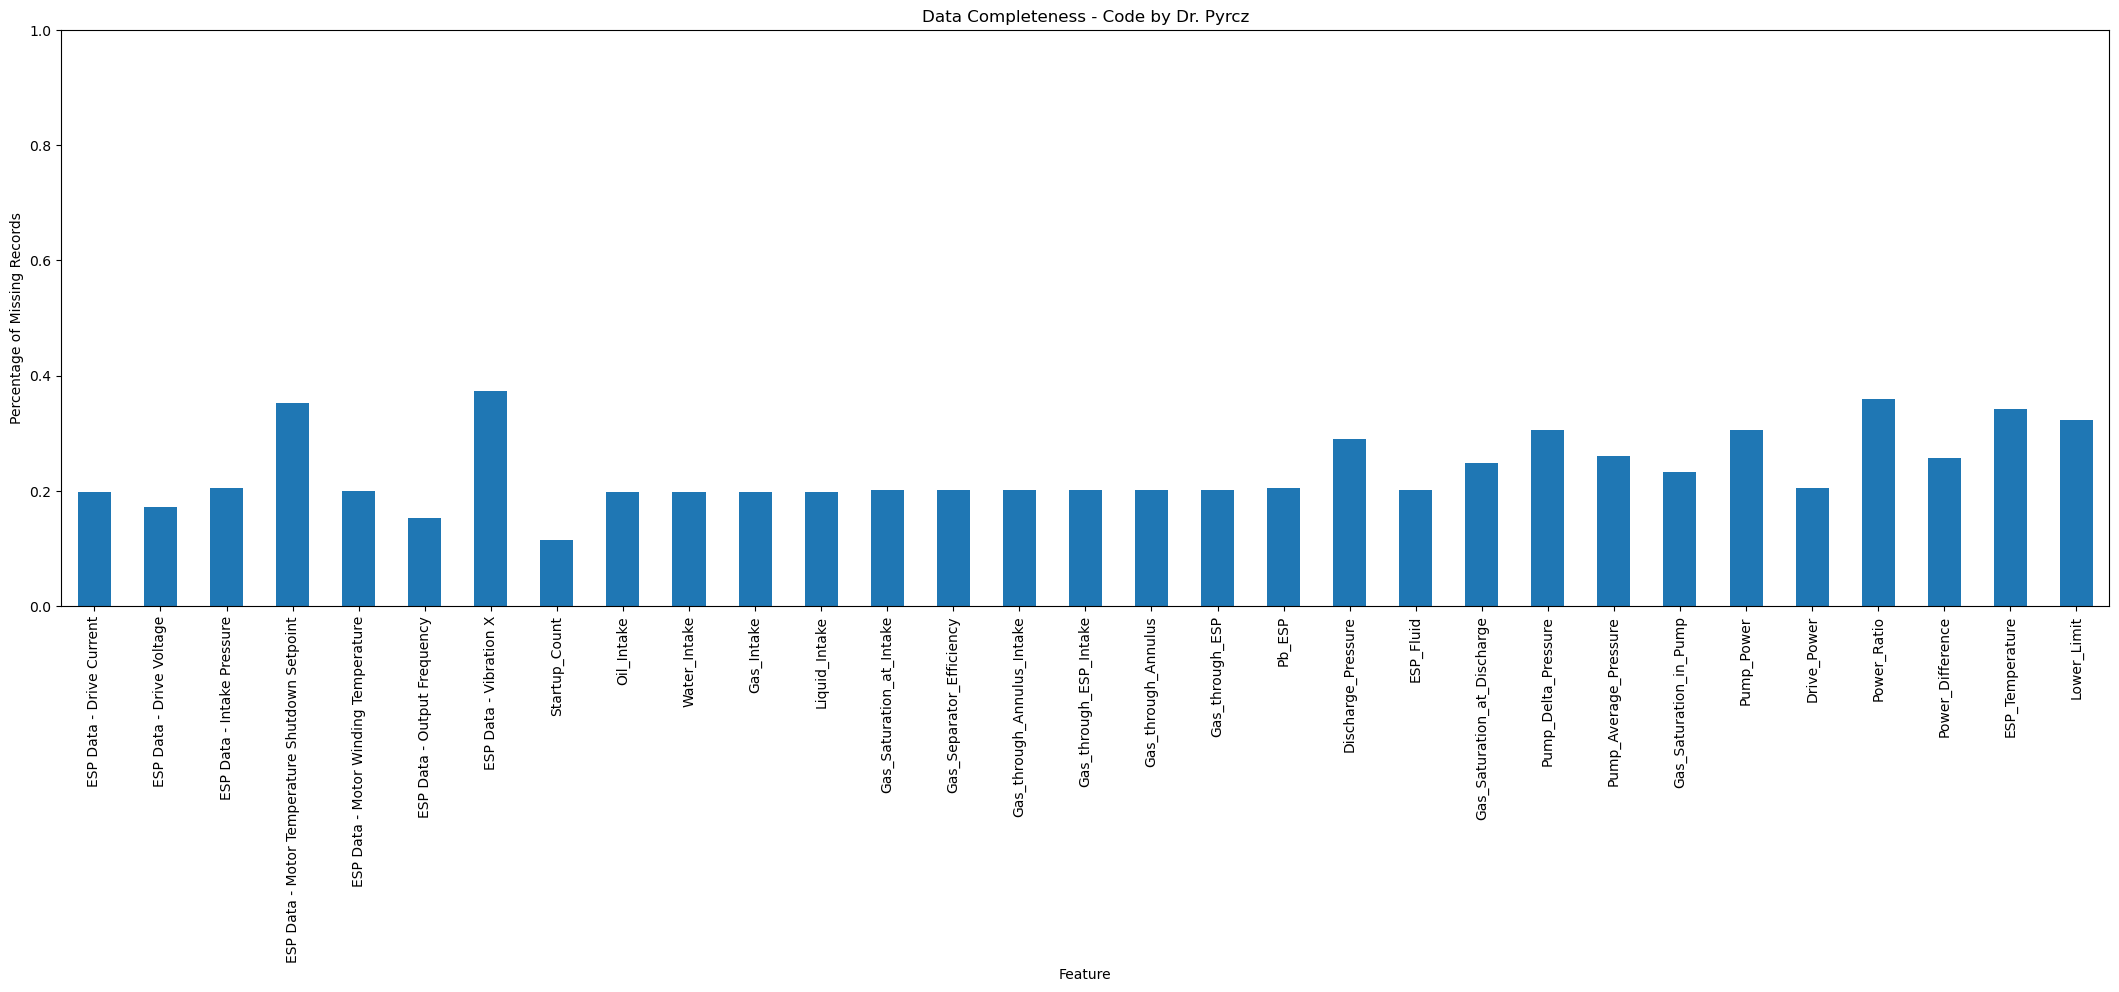

In [2]:
df0.drop(["OIL","GAS","WATER","Well_ID","AL_Key","ARTIFICIAL_LIFT","DOWN_TIME_HOURS"], axis=1,inplace=True)

(df0.isnull().sum()/len(df0)).plot(kind = 'bar')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2) # plot formatting
plt.xlabel('Feature'); plt.ylabel('Percentage of Missing Records'); plt.title('Data Completeness - Code by Dr. Pyrcz')
plt.ylim([0,1.0])
plt.show()


In [71]:
temp=daily_data2[(daily_data2['Well_ID'] == 43) & (daily_data2['AL_Key'] == 'ESP_1')]
temp.drop(columns=['ARTIFICIAL_LIFT','AL_Key','Unnamed: 0'], inplace=True)

/var/folders/xd/5wz9ptjd6pnfmzv7g8blq4qm0000gn/T/ipykernel_35027/4011812915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop(columns=['ARTIFICIAL_LIFT','AL_Key','Unnamed: 0'], inplace=True)


Below we have selected a combination and we are checking how the features are impacted in the whole duration when the pump reaches failure

<AxesSubplot:xlabel='Day'>

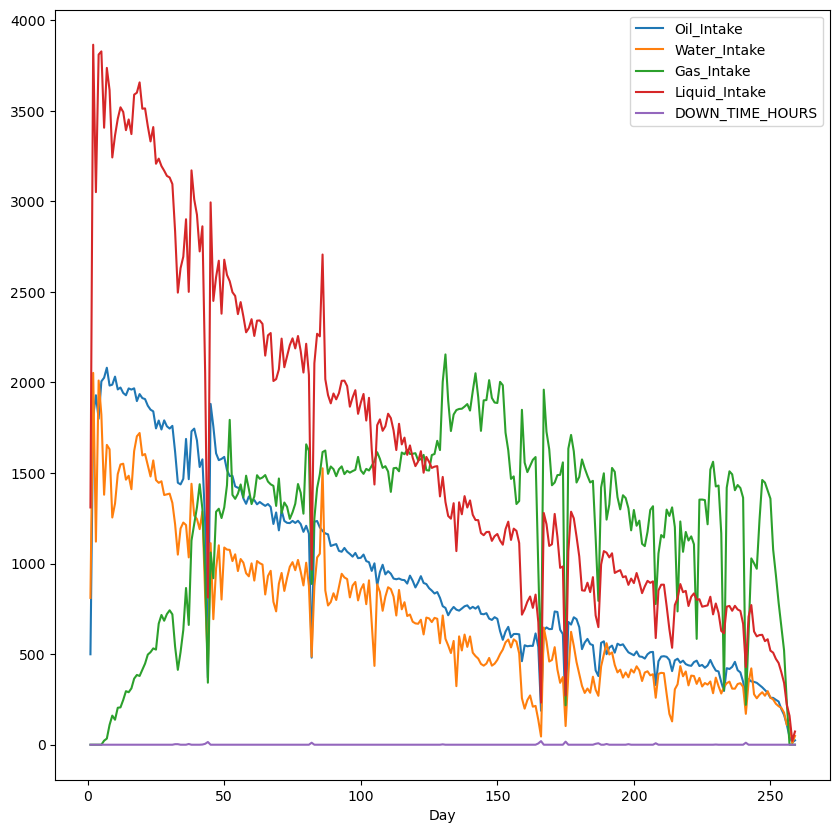

In [72]:
temp.plot(x="Day", y=["Oil_Intake","Water_Intake","Gas_Intake","Liquid_Intake"],kind="line", figsize=(10, 10))

Features such as Oil Intake, Water Intake, Gas Itake have reduced significantly whereas Features such as Downtime have not impacted at all. They have no pattern or trend whatsoever

<AxesSubplot:xlabel='Day'>

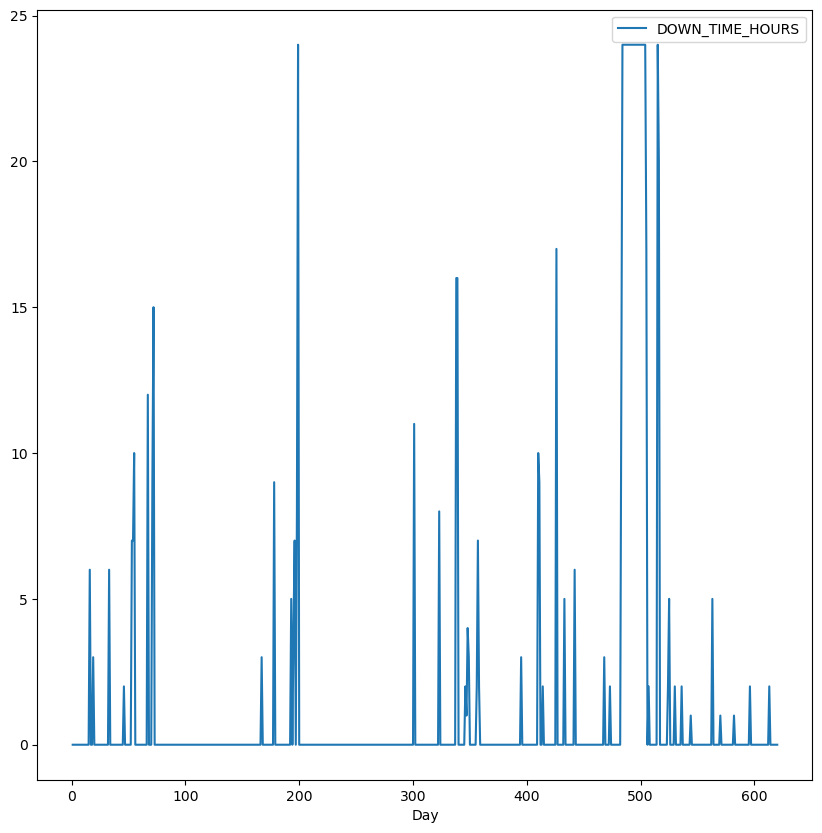

In [63]:
temp.plot(x="Day", y=["DOWN_TIME_HOURS"],kind="line", figsize=(10, 10))

In this graph we can clearly see that the Water production has reduced to a very great extent with each passing day towards failure

<AxesSubplot:xlabel='Day'>

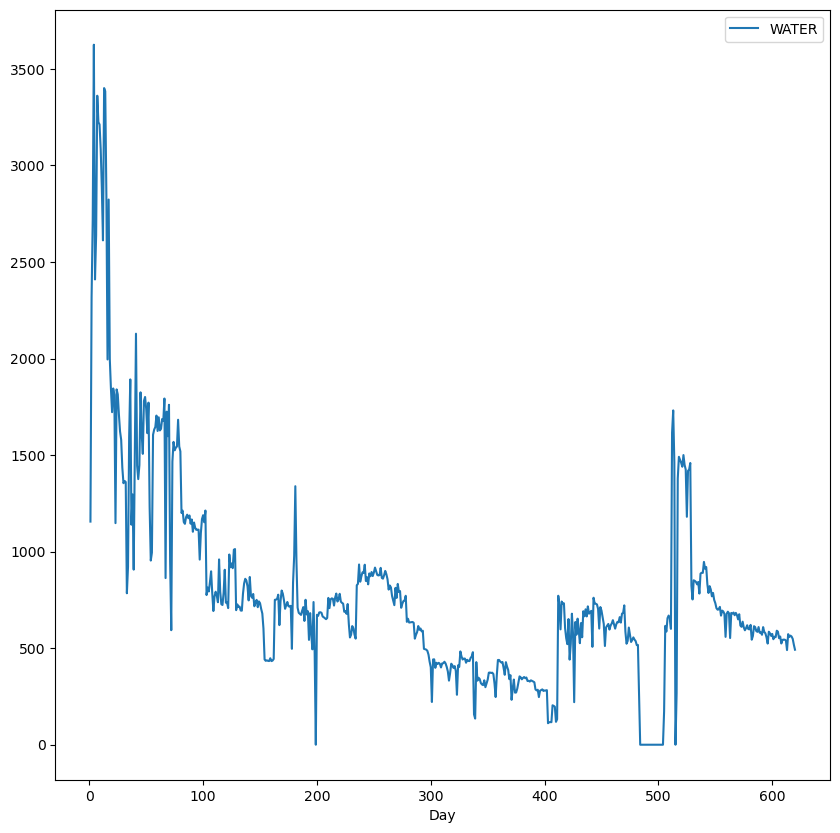

In [64]:
temp.plot(x="Day", y=["WATER"],kind="line", figsize=(10, 10))

This is showing a scatterplot in between all variables in the daily data

In [67]:
sns.pairplot(temp)

Since our method relies on the assumption of pairwise correlation, we check the correlation matrix and confirm this. 

<AxesSubplot:>

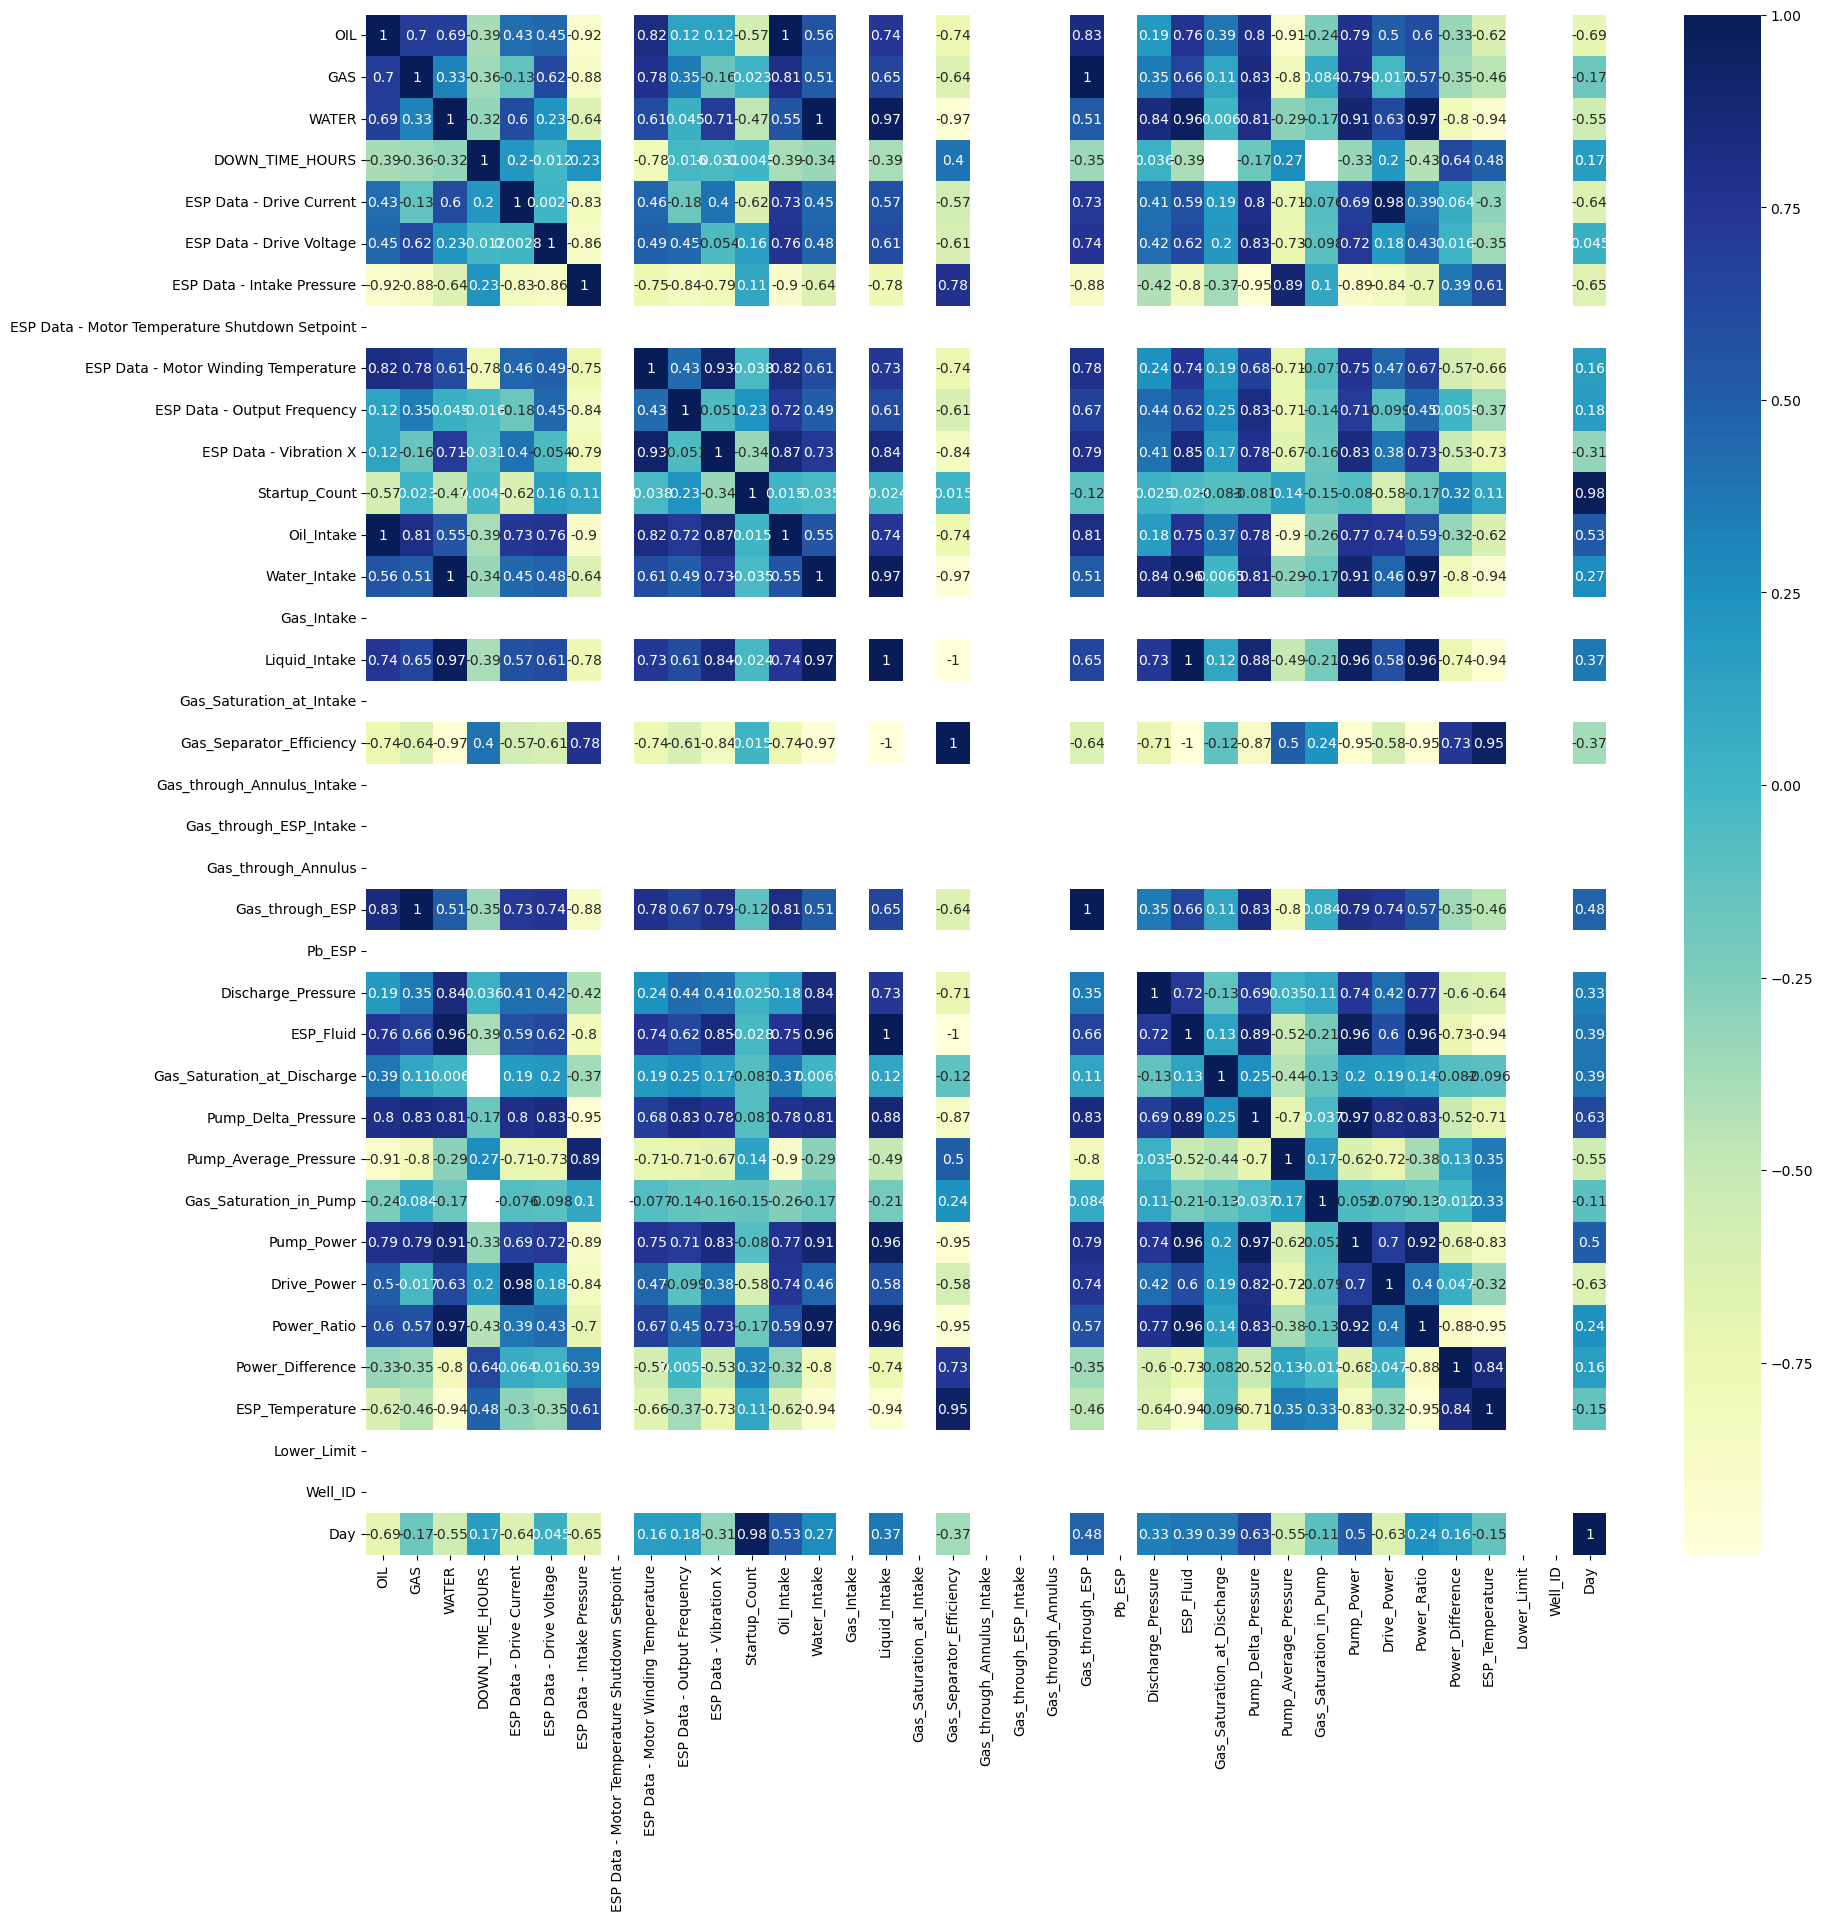

In [70]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(temp.corr(), cmap="YlGnBu", annot=True, ax=ax)

The above one was on one combination and the below one is on the whole data. We can see how Oil Production and Oil Intake are correlated or how Water Intake and Water Production are highly correlated. This all makes sense with domain knowledge as well. This helps us in  FEATURE SELECTION

<AxesSubplot:>

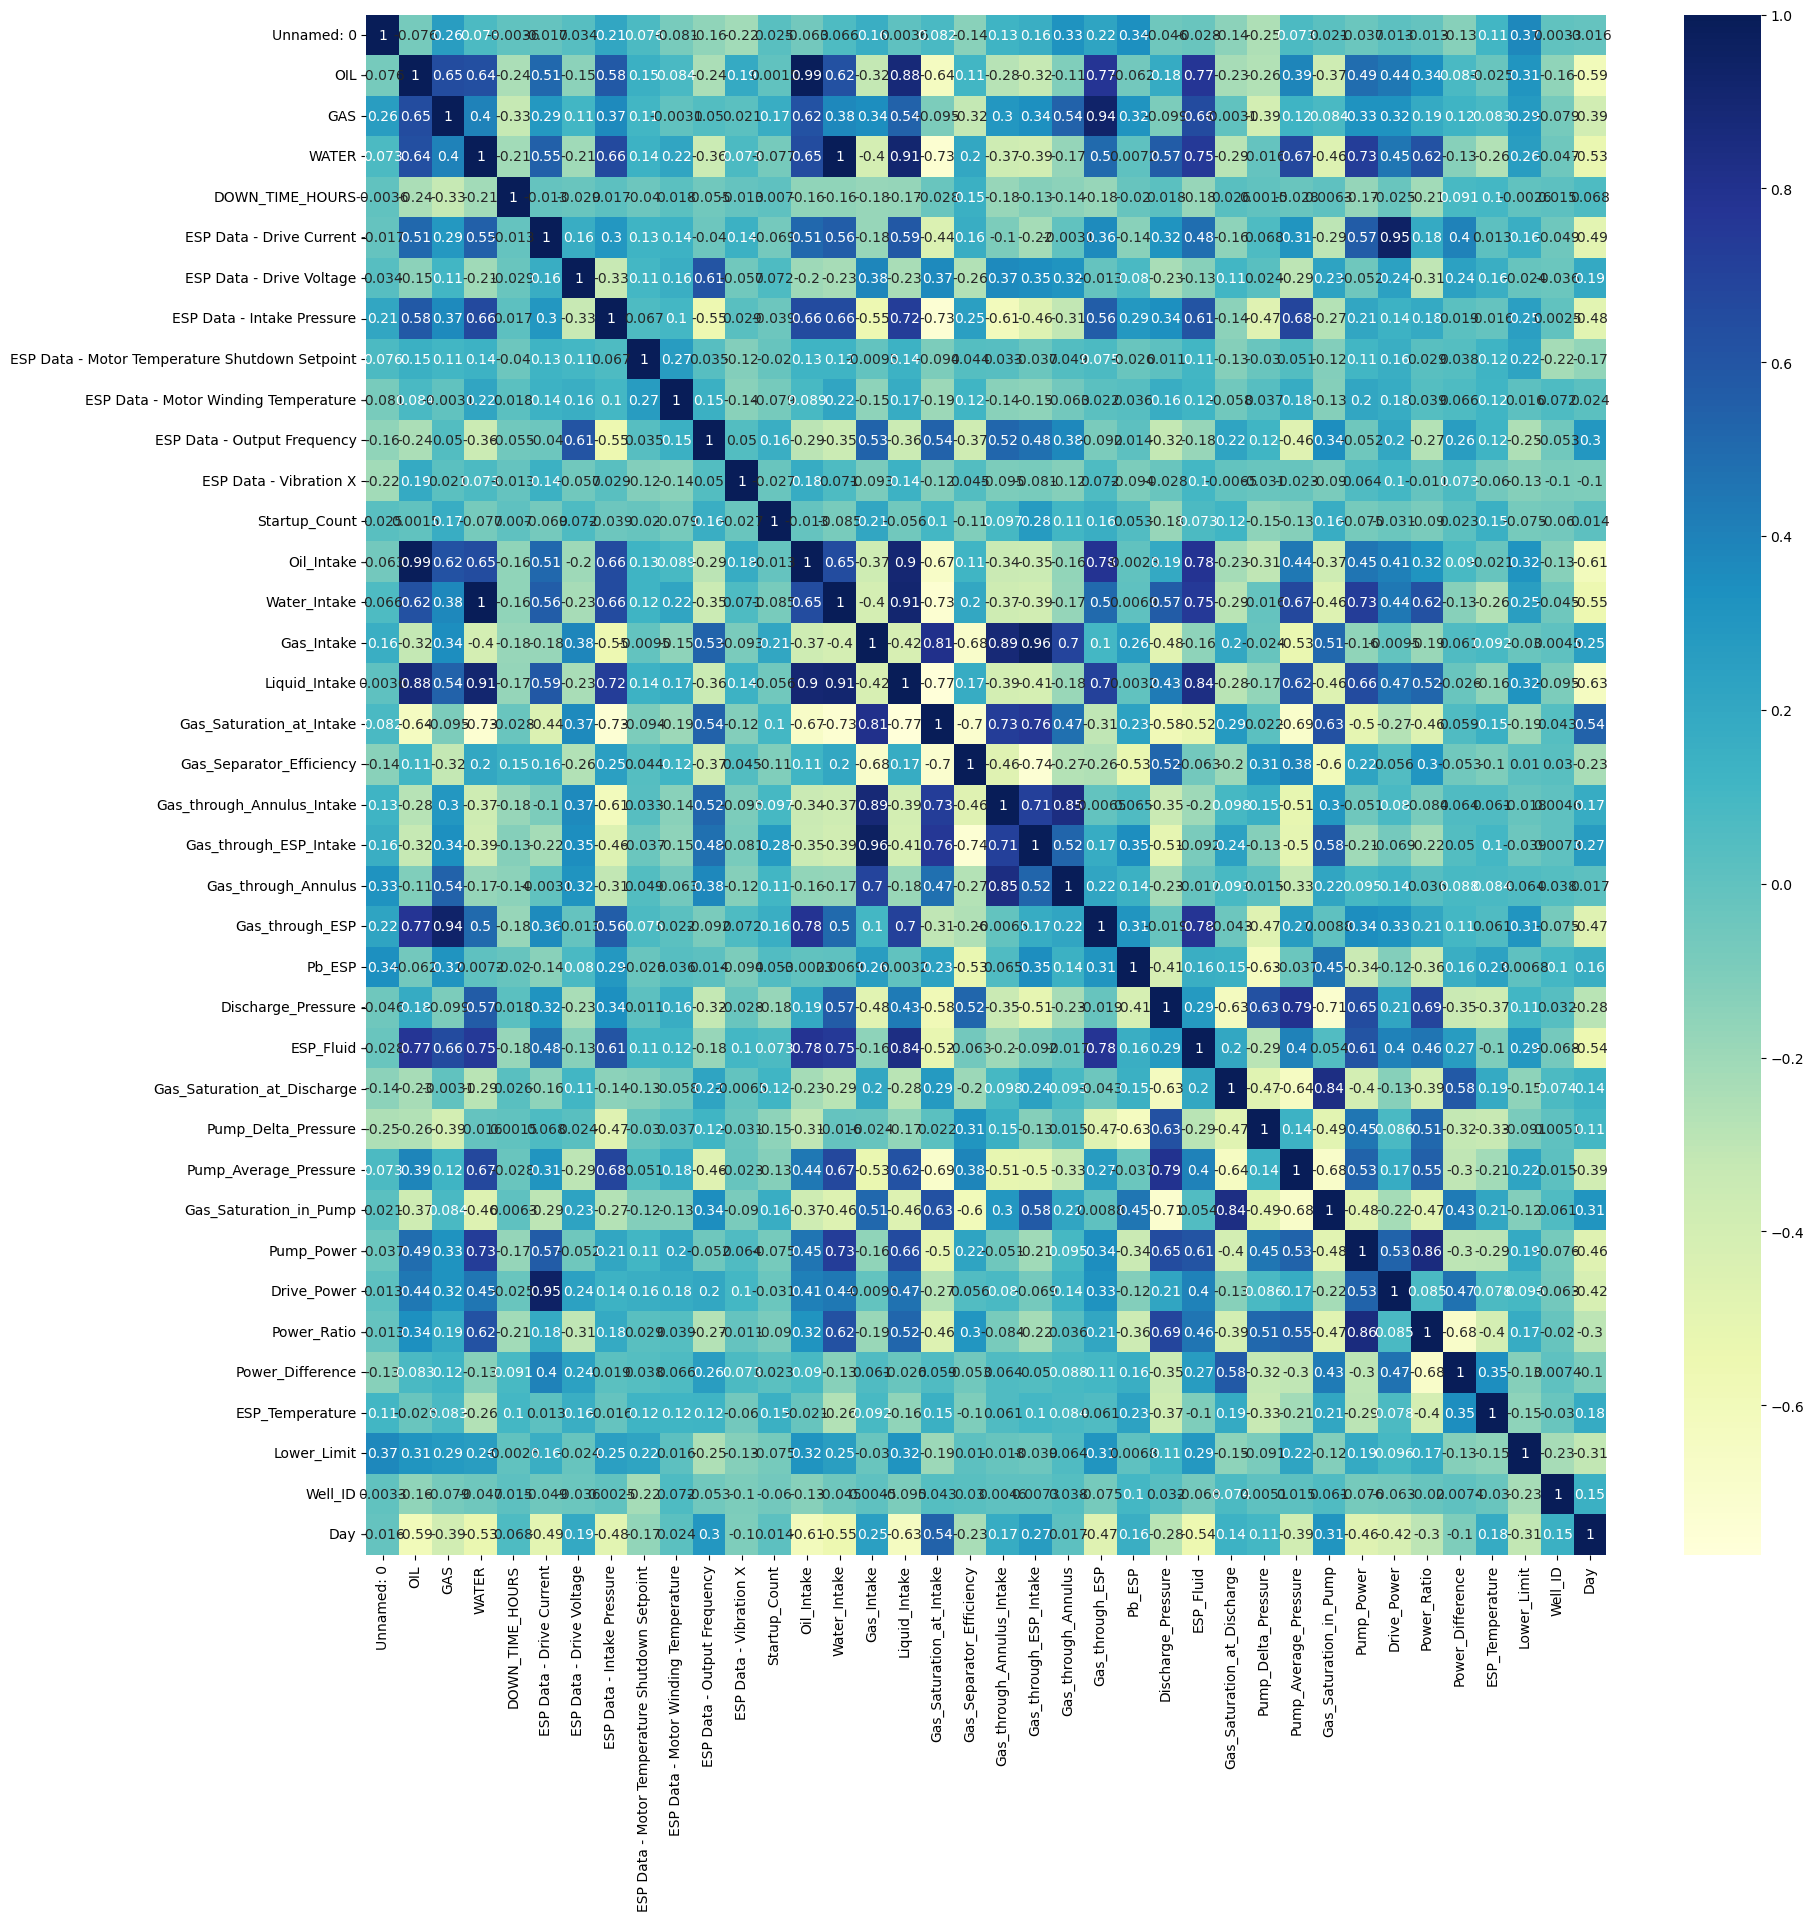

In [74]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(daily_data2.corr(), cmap="YlGnBu", annot=True, ax=ax)

We have also drawn some violin plots for features we think are important to see the quantile distributions and look at the peak values

[Text(0, 0, 'Power Difference')]

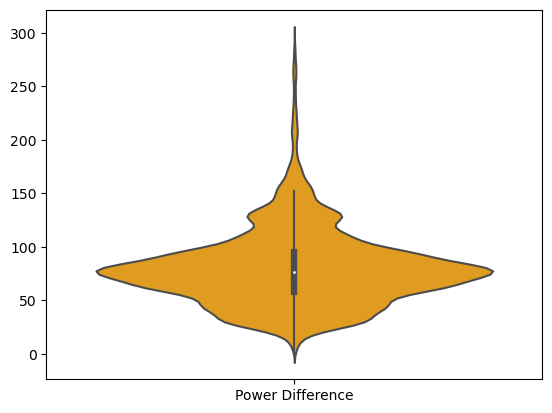

In [3]:
ax = sns.violinplot(df['Power_Difference'],color="orange")
ax.set_xticklabels(['Power Difference'])

[Text(0, 0, 'ESP_Temperature')]

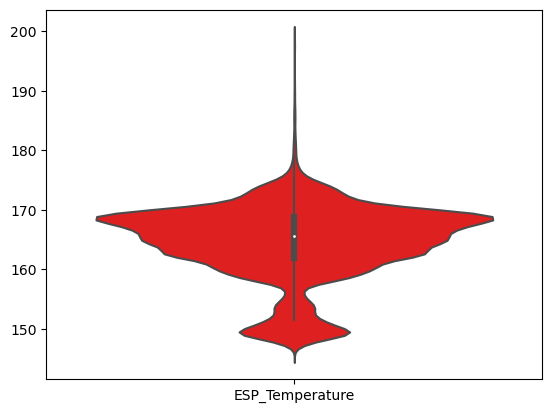

In [4]:
label = "ESP_Temperature"
ax = sns.violinplot(df[label],color="r")
ax.set_xticklabels([label])

[Text(0, 0, 'Discharge_Pressure')]

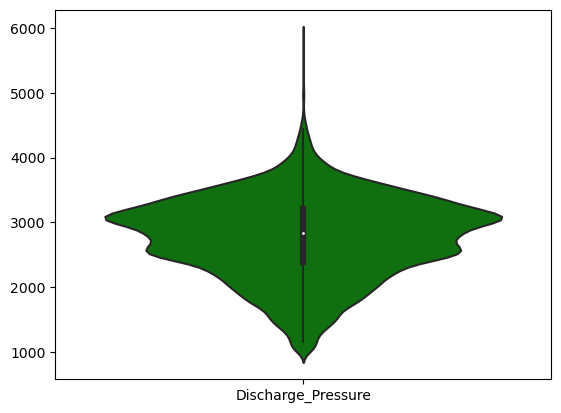

In [5]:
label = "Discharge_Pressure"
ax = sns.violinplot(df[label],color="g")
ax.set_xticklabels([label])


### Feature Imputation for Dynamic Daily Data

We can see here that all the features in daily data have high number of outliers and hence we cannot use central tendencies or backward or forward filling to fill the missing values. That only leaves us with feature imputation

<AxesSubplot:>

<AxesSubplot:xlabel='Oil_Intake'>

Text(0.5, 1.0, 'Boxplot of Oil_Intake for All Pumps')

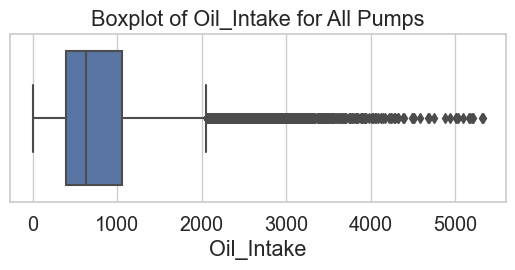

In [32]:
#plot the result


plt.subplot(2,1,1)
sns.set(font_scale=1.3, style="whitegrid")
sns.boxplot(x =daily_data['Oil_Intake'])
plt.title('Boxplot of Oil_Intake for All Pumps')

plt.show()

[Text(0, 0, 'OIL'),
 Text(1, 0, 'GAS'),
 Text(2, 0, 'WATER'),
 Text(3, 0, 'DOWN_TIME_HOURS'),
 Text(4, 0, 'ESP Data - Drive Current'),
 Text(5, 0, 'ESP Data - Drive Voltage'),
 Text(6, 0, 'ESP Data - Intake Pressure'),
 Text(7, 0, 'ESP Data - Motor Temperature Shutdown Setpoint'),
 Text(8, 0, 'ESP Data - Motor Winding Temperature'),
 Text(9, 0, 'ESP Data - Output Frequency'),
 Text(10, 0, 'ESP Data - Vibration X'),
 Text(11, 0, 'Startup_Count'),
 Text(12, 0, 'Oil_Intake'),
 Text(13, 0, 'Water_Intake'),
 Text(14, 0, 'Gas_Intake'),
 Text(15, 0, 'Liquid_Intake'),
 Text(16, 0, 'Gas_Saturation_at_Intake'),
 Text(17, 0, 'Gas_Separator_Efficiency'),
 Text(18, 0, 'Gas_through_Annulus_Intake'),
 Text(19, 0, 'Gas_through_ESP_Intake'),
 Text(20, 0, 'Gas_through_Annulus'),
 Text(21, 0, 'Gas_through_ESP'),
 Text(22, 0, 'Pb_ESP'),
 Text(23, 0, 'Discharge_Pressure'),
 Text(24, 0, 'ESP_Fluid'),
 Text(25, 0, 'Gas_Saturation_at_Discharge'),
 Text(26, 0, 'Pump_Delta_Pressure'),
 Text(27, 0, 'Pump_Average

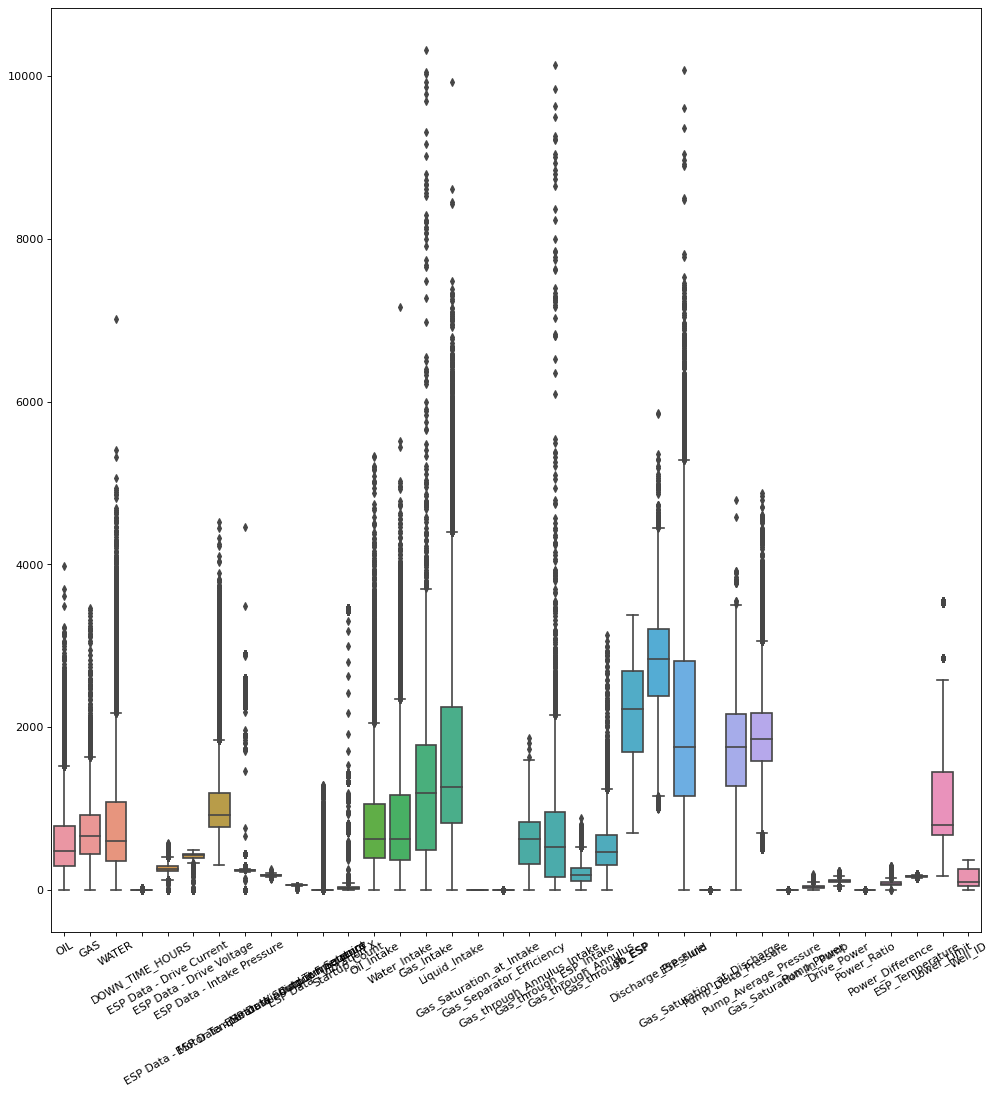

In [78]:
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=80)
g=sns.boxplot(data=daily_data)
g.set_xticklabels(g.get_xticklabels(),rotation=30)


In [51]:
daily_data['Imputed'] = (daily_data.isnull().sum(axis=1)) > 0
daily_data.head()

OIL          GAS        WATER ARTIFICIAL_LIFT  DOWN_TIME_HOURS  \
0   615.154601   650.447788   526.488655             ESP             11.0   
1  1224.193640  1232.455787   809.414685             ESP              0.0   
2  1007.769762  1047.068544   667.933899             ESP              0.0   
3  1514.641876  1370.143160  1122.137652             ESP              0.0   
4  1089.741764  1387.138130  1156.169599             ESP              0.0   

   ESP Data - Drive Current  ESP Data - Drive Voltage  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   ESP Data - Intake Pressure  ESP Data - Motor Temperature Shutdown Setpoint  \
0                         NaN                                             NaN   
1                         NaN                                             NaN   
2                         NaN                                             NaN   
3                         NaN                                             NaN   
4                         NaN                                             NaN   

   ESP Data - Motor Winding Temperature  ESP Data - Output Frequency  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   ESP Data - Vibration X  Startup_Count  Oil_Intake  Water_Intake  \
0                     NaN            NaN         NaN           NaN   
1                     NaN            NaN         NaN           NaN   
2                     NaN            NaN         NaN           NaN   
3                     NaN            NaN         NaN           NaN   
4                     NaN            NaN         NaN           NaN   

   Gas_Intake  Liquid_Intake  Gas_Saturation_at_Intake  \
0         NaN            NaN                       NaN   
1         NaN            NaN                       NaN   
2         NaN            NaN                       NaN   
3         NaN            NaN                       NaN   
4         NaN            NaN                       NaN   

   Gas_Separator_Efficiency  Gas_through_Annulus_Intake  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   

   Gas_through_ESP_Intake  Gas_through_Annulus  Gas_through_ESP  Pb_ESP  \
0                     NaN                  NaN              NaN     NaN   
1                     NaN                  NaN              NaN     NaN   
2                     NaN                  NaN              NaN     NaN   
3                     NaN                  NaN              NaN     NaN   
4                     NaN                  NaN              NaN     NaN   

   Discharge_Pressure  ESP_Fluid  Gas_Saturation_at_Discharge  \
0                 NaN        NaN                          NaN   
1                 NaN        NaN                          NaN   
2                 NaN        NaN                          NaN   
3                 NaN        NaN                          NaN   
4                 NaN        NaN                          NaN   

   Pump_Delta_Pressure  Pump_Average_Pressure  Gas_Saturation_in_Pump  \
0                  NaN                    NaN                     NaN   
1                  NaN                    NaN                     NaN   
2                  NaN                    NaN                     NaN   
3                  NaN    

We implemented KNN and MICE both but we saw MICE gives negative results for some variables and hence we finalised KNN for this dataset

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

artificial_lift=daily_data['ARTIFICIAL_LIFT']
imputation_df = daily_data.drop(columns=['ARTIFICIAL_LIFT'])

lr = LinearRegression()
mice_imputer = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
imputation_df.iloc[:,0:35] = mice_imputer.fit_transform(imputation_df.iloc[:,0:35])



[IterativeImputer] Completing matrix with shape (50056, 35)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.05
[IterativeImputer] Change: 170539.1089126758, scaled tolerance: 10.32562712 
[IterativeImputer] Ending imputation round 2/10, elapsed time 2.05
[IterativeImputer] Change: 110577.62375480073, scaled tolerance: 10.32562712 
[IterativeImputer] Ending imputation round 3/10, elapsed time 3.05
[IterativeImputer] Change: 9594.58020504732, scaled tolerance: 10.32562712 
[IterativeImputer] Ending imputation round 4/10, elapsed time 4.05
[IterativeImputer] Change: 3459.1662626742755, scaled tolerance: 10.32562712 
[IterativeImputer] Ending imputation round 5/10, elapsed time 5.05
[IterativeImputer] Change: 1591.4412455214053, scaled tolerance: 10.32562712 
[IterativeImputer] Ending imputation round 6/10, elapsed time 6.05
[IterativeImputer] Change: 1110.5474610511965, scaled tolerance: 10.32562712 
[IterativeImputer] Ending imputation round 7/10, elapsed time 7.10
[Itera

In [10]:
from sklearn.impute import KNNImputer

knn_imputation_df = daily_data.drop(columns=['ARTIFICIAL_LIFT'])

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
knn_imputation_df.iloc[:,0:35] = knn_imputer.fit_transform(knn_imputation_df.iloc[:,0:35])

In [7]:
imputation_df.head(5)

OIL          GAS        WATER  DOWN_TIME_HOURS  \
0   615.154601   650.447788   526.488655             11.0   
1  1224.193640  1232.455787   809.414685              0.0   
2  1007.769762  1047.068544   667.933899              0.0   
3  1514.641876  1370.143160  1122.137652              0.0   
4  1089.741764  1387.138130  1156.169599              0.0   

   ESP Data - Drive Current  ESP Data - Drive Voltage  \
0                258.437117                414.576740   
1                238.902347                424.888939   
2                243.844932                424.626674   
3                237.398401                419.695844   
4                237.095592                424.304730   

   ESP Data - Intake Pressure  ESP Data - Motor Temperature Shutdown Setpoint  \
0                -1859.726889                                      492.011687   
1                 -761.442878                                      785.360453   
2                -1555.546132                                      653.700678   
3                 1495.756753                                      933.640943   
4                 2989.291784                                      895.212759   

   ESP Data - Motor Winding Temperature  ESP Data - Output Frequency  ...  \
0                            181.848316                    58.119270  ...   
1                            177.591264                    59.120683  ...   
2                            178.899800                    59.134614  ...   
3                            175.608833                    58.092936  ...   
4                            178.094828                    57.121436  ...   

   Gas_Saturation_in_Pump  Pump_Power  Drive_Power  Power_Ratio  \
0                0.278920    6.951620   108.033259     9.885855   
1                0.220683  103.377113   104.655959     4.777898   
2                0.250650   65.430023   105.674572     7.910317   
3                0.147916  164.087023   103.712237    -3.292318   
4                0.078366  116.277959   103.616306    -6.612786   

   Power_Difference  ESP_Temperature  Lower_Limit  AL_Key  Well_ID  \
0        101.357153       455.734507  1221.291595   ESP_2      345   
1          1.384782       183.585497  1330.911987   ESP_2      345   
2         40.448477       318.797540  1217.224899   ESP_2      345   
3        -60.511437      -115.231854  1454.997765   ESP_2      345   
4        -12.879282      -147.654730  1436.962353   ESP_2      345   

   ARTIFICIAL_LIFT  
0              ESP  
1              ESP  
2              ESP  
3              ESP  
4              ESP  

[5 rows x 38 columns]

In [6]:
imputation_df['ARTIFICIAL_LIFT'] = artificial_lift 

In [14]:
pd.options.display.max_columns = None
imputation_df.describe(include='all')

OIL           GAS         WATER  DOWN_TIME_HOURS  \
count   50056.000000  50056.000000  50056.000000     50056.000000   
unique           NaN           NaN           NaN              NaN   
top              NaN           NaN           NaN              NaN   
freq             NaN           NaN           NaN              NaN   
mean      586.676443    683.050262    803.826149         0.993951   
std       416.082632    357.931967    649.363710         3.961886   
min         0.000000      0.000000      0.000000         0.000000   
25%       294.605898    439.698203    351.200431         0.000000   
50%       482.662466    660.107224    604.593309         0.000000   
75%       785.034266    917.465721   1082.302200         0.000000   
max      3979.729266   3460.787784   7011.564091        24.000000   

        ESP Data - Drive Current  ESP Data - Drive Voltage  \
count               50056.000000              50056.000000   
unique                       NaN                       NaN   
top                          NaN                       NaN   
freq                         NaN                       NaN   
mean                  258.039891                415.719736   
std                    62.361935                 46.600071   
min                     0.000000                  0.000000   
25%                   233.116939                398.848626   
50%                   259.722002                421.061005   
75%                   289.115581                439.892752   
max                   570.267352                495.718765   

        ESP Data - Intake Pressure  \
count                 50056.000000   
unique                         NaN   
top                            NaN   
freq                           NaN   
mean                    904.557137   
std                    2519.193554   
min                  -10089.023399   
25%                     655.637437   
50%                     886.129854   
75%                    1225.627046   
max                   42109.909849   

        ESP Data - Motor Temperature Shutdown Setpoint  \
count                                     50056.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                        472.489193   
std                                         616.775364   
min                                        -749.211456   
25%                                         230.000000   
50%                                         240.000000   
75%                                         454.192231   
max                                        4460.000000   

        ESP Data - Motor Winding Temperature  ESP Data - Output Frequency  \
count                           50056.000000                 50056.000000   
unique                                   NaN                          NaN   
top                                      NaN                          NaN   
freq                                     NaN                          NaN   
mean                              181.029832                    56.635265   
std                                 8.408470                     5.031485   
min                               135.223159                     5.390000   
25%                               175.805469                    54.000000   
50%                               180.924158                    58.000000   
75%                               185.546744                    60.000000   
max                               260.799988                    69.000000   

        ESP Data - Vibration X  Startup_Count    Oil_Intake  Water_Intake  \
count             50056.000000   50056.000000  50056.000000  50056.000000   
unique                     NaN            NaN           NaN           NaN   
top                        NaN            NaN           NaN           NaN   
freq                       NaN            NaN           

In [8]:
imputation_df.to_csv('imputed_daily_data.csv')

In [11]:
knn_imputation_df.head(5)

OIL          GAS        WATER  DOWN_TIME_HOURS  \
0   615.154601   650.447788   526.488655             11.0   
1  1224.193640  1232.455787   809.414685              0.0   
2  1007.769762  1047.068544   667.933899              0.0   
3  1514.641876  1370.143160  1122.137652              0.0   
4  1089.741764  1387.138130  1156.169599              0.0   

   ESP Data - Drive Current  ESP Data - Drive Voltage  \
0                267.817708                436.735558   
1                339.358953                430.419207   
2                285.163461                448.065243   
3                351.497012                387.881310   
4                381.346638                433.203385   

   ESP Data - Intake Pressure  ESP Data - Motor Temperature Shutdown Setpoint  \
0                  646.172372                                           235.0   
1                 1287.344419                                           230.0   
2                 1075.463372                                           240.0   
3                 2018.891593                                          1300.0   
4                 1231.229751                                           240.0   

   ESP Data - Motor Winding Temperature  ESP Data - Output Frequency  ...  \
0                            176.068886                    55.000000  ...   
1                            182.867442                    60.000000  ...   
2                            184.749557                    63.940648  ...   
3                            187.423889                    54.944991  ...   
4                            185.367489                    60.000000  ...   

   Pump_Average_Pressure  Gas_Saturation_in_Pump  Pump_Power  Drive_Power  \
0            1611.744675            4.887142e-02   35.527863   117.022708   
1            1980.377557            1.390000e-16   44.195942   145.880851   
2            1924.694225            2.780000e-16   43.689143   127.738957   
3            2459.480248            1.665000e-16   37.992893   136.863185   
4            1957.498357            2.165350e-02   54.288465   164.073401   

   Power_Ratio  Power_Difference  ESP_Temperature  Lower_Limit  AL_Key  \
0     0.365132         81.494845       163.525416       1000.0   ESP_2   
1     0.339646        101.684909       168.850652        700.0   ESP_2   
2     0.381920         84.049814       166.303062       1112.5   ESP_2   
3     0.307996         98.870291       169.435008       1087.5   ESP_2   
4     0.372447        109.784936       166.840131        675.0   ESP_2   

   Well_ID  
0      345  
1      345  
2      345  
3      345  
4      345  

[5 rows x 37 columns]

In [15]:
knn_imputation_df.describe(include='all')

OIL           GAS         WATER  DOWN_TIME_HOURS  \
count   50056.000000  50056.000000  50056.000000     50056.000000   
unique           NaN           NaN           NaN              NaN   
top              NaN           NaN           NaN              NaN   
freq             NaN           NaN           NaN              NaN   
mean      586.692001    683.030797    803.837245         0.994300   
std       416.110572    357.948832    649.405384         3.963217   
min         0.000000      0.000000      0.000000         0.000000   
25%       294.564492    439.679839    351.194557         0.000000   
50%       482.662466    660.094888    604.544784         0.000000   
75%       785.070852    917.465721   1082.330157         0.000000   
max      3979.729266   3460.787784   7011.564091        24.000000   

        ESP Data - Drive Current  ESP Data - Drive Voltage  \
count               50056.000000              50056.000000   
unique                       NaN                       NaN   
top                          NaN                       NaN   
freq                         NaN                       NaN   
mean                  261.679722                414.824507   
std                    71.590777                 50.449877   
min                     0.000000                  0.000000   
25%                   228.079939                394.354351   
50%                   262.378291                423.112611   
75%                   301.742554                442.269933   
max                   570.267352                487.500000   

        ESP Data - Intake Pressure  \
count                 50056.000000   
unique                         NaN   
top                            NaN   
freq                           NaN   
mean                   1113.327567   
std                     585.912873   
min                     300.599873   
25%                     774.389228   
50%                     928.579481   
75%                    1211.444551   
max                    4519.367705   

        ESP Data - Motor Temperature Shutdown Setpoint  \
count                                     50056.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                        449.236217   
std                                         691.762275   
min                                           0.000000   
25%                                         230.000000   
50%                                         240.000000   
75%                                         240.000000   
max                                        4460.000000   

        ESP Data - Motor Winding Temperature  ESP Data - Output Frequency  \
count                           50056.000000                 50056.000000   
unique                                   NaN                          NaN   
top                                      NaN                          NaN   
freq                                     NaN                          NaN   
mean                              180.854714                    56.531311   
std                                 8.826001                     5.200606   
min                               135.223159                     5.390000   
25%                               175.020239                    53.687870   
50%                               180.019122                    57.999931   
75%                               186.073289                    60.000000   
max                               260.799988                    69.000000   

        ESP Data - Vibration X  Startup_Count    Oil_Intake  Water_Intake  \
count             50056.000000   50056.000000  50056.000000  50056.000000   
unique                     NaN            NaN           NaN           NaN   
top                        NaN            NaN           NaN           NaN   
freq                       NaN            NaN           

In [16]:
knn_imputation_df['ARTIFICIAL_LIFT'] = artificial_lift 
knn_imputation_df.to_csv('knn_imputed_daily_data.csv')

### Preprocessing and Feature Engineering

In [ ]:
sol_df = pd.read_csv("/Users/muskaansinghania/Downloads/solution.csv")
well_df = pd.read_csv("/Users/muskaansinghania/Downloads/imputed_well_data.csv")
data_pro = pd.read_csv("/Users/muskaansinghania/Downloads/knn_imputed_daily_data.csv")

Constructing the Target Variable

In [ ]:
sol_df['Status'] = 'S'

In [ ]:
data_pro['target'] = 0
for i in range(len(data_pro)):
    if( i == (len(data_pro)-1)):
        data_pro['target'][i] = 1
    elif(data_pro['Well_ID'][i] != data_pro['Well_ID'][i+1]):
        data_pro['target'][i] = 1
    elif(data_pro['AL_Key'][i] != data_pro['AL_Key'][i+1]):
        data_pro['target'][i] = 1

In [ ]:
data_final = data_pro.merge(well_df, how='left', on=['AL_Key', 'Well_ID'])

In [ ]:
sol_df = sol_df.drop(['Fail in 30 days'], axis=1)

In [ ]:
data_fin_2 = data_final.merge(sol_df, how='left', on=['AL_Key', 'Well_ID'])

In [ ]:
data_fin_2['Status'] = data_fin_2['Status'].fillna('F')

In [ ]:
data_fin_2.to_csv('/Users/muskaansinghania/Downloads/fin_data_2.csv')

In [ ]:
data = pd.read_csv('fin_data_2.csv')

In [ ]:
data.loc[data['Status']=='S', 'target'] = 0

In [ ]:
data['day_no'] = 0 
count = 0
for i in range(len(data)):
    if(i==0):
        data['day_no'][i] = count + 1
        count = count + 1
    elif(data['Well_ID'][i] != data['Well_ID'][i-1]):
        data['day_no'][i] = 1
        count = 1
    else:
    data['day_no'][i] = count + 1
    count = count + 1

In [ ]:
max_data = data.groupby('Well_ID').max('day_no')['day_no'].to_frame()

In [ ]:
max_data.rename(columns={"day_no": "max_day"}, inplace=True)

In [ ]:
impute_data = data.merge(max_data, how = 'left', on='Well_ID')

In [ ]:
train_data = impute_data[(impute_data['max_day']-impute_data['day_no']) >= 30]

In [ ]:
main_op = impute_data[(impute_data['max_day']-impute_data['day_no']) < 30]
main_op = main_op[main_op['Status']=='S']
main_op = main_op[main_op['max_day'] == main_op['day_no']]

In [ ]:
main_op = main_op.drop(['Status','Unnamed: 0', 'Unnamed: 0_x', 'ARTIFICIAL_LIFT', 'target', 'Unnamed: 0.1', 'Unnamed: 0_y', 'Artificial_Lift_Type', 'day_no', 'AL_Key'], axis=1)

In [ ]:
train_data = train_data[train_data['Status'] == 'F']
train_data.loc[train_data.groupby(["Well_ID"])["day_no"].idxmax(), 'target'] = 1

In [ ]:
x = train_data.drop(['Status','Unnamed: 0', 'Unnamed: 0_x', 'ARTIFICIAL_LIFT', 'target', 'Unnamed: 0.1', 'Unnamed: 0_y', 'Artificial_Lift_Type', 'day_no', 'AL_Key'], axis=1)
Y = train_data['target']

Splitting the data into train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,Y, test_size = 0.20, random_state = 42)

In [ ]:
class_weights = {0: 1 ,
                1: 25}

In [ ]:
x = (x-x.min())/(x.max()-x.min())

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,Y, test_size = 0.20, random_state = 42)

### Implementing the Machine Learning Model - LSTM

In [ ]:
def get_model(params, input_shape):
    model = Sequential()
    model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
    model.add(Dropout(rate=params["dropout"]))
    
    model.add(LSTM(units=params["lstm_units"], return_sequences=True))
    model.add(Dropout(rate=params["dropout"]))
    
    model.add(LSTM(units=params["lstm_units"], return_sequences=True))
    model.add(Dropout(rate=params["dropout"]))
    
    model.add(LSTM(units=params["lstm_units"], return_sequences=False))
    model.add(Dropout(rate=params["dropout"]))

    model.add(Dense(1))
    
    model.compile(loss=params["loss"],
                optimizer=params["optimizer"],
                metrics=tf.keras.metrics.BinaryAccuracy())
    return model


Deciding the right parameters for the model

In [ ]:
params = {
    "loss": "BinaryCrossentropy",
    "optimizer": "adam",
    "dropout": 0.2,
    "lstm_units": 30,
    "epochs": 30,
    "batch_size": 128,
}

model = get_model(params=params, input_shape=X_train.shape[1])

In [ ]:
model.fit(X_train, Y_train, epochs = 10, batch_size=128, verbose = 1,
          class_weight=class_weights, validation_data=(X_test, Y_test))

In [ ]:
main_pred = tf.argmax(model.predict(main_op), axis=1)
pred_df = pd.DataFrame(main_pred, columns = ['Fail in 30 days'])

Writing the results in A seperate CSV

In [ ]:
sol_df = sol_df.merge(pred_df)
sol_df.to_csv('soln_csv')